## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.


en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 6). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**

les 4 premieres composantes servent à "agir sur le code" :
  - 2D pour la translation, 
  - 1D pour l'homotetie, 
  - 1D pour la rotation. 
Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.

**ici, on ajoute une dimension codant pour la rotation. De manière interessante, un des translatiuon est encodee dans une composante rotationnelle**:
  - la translation horizontale est encodee par la rotation sur le code latent (#dim = 3)
  - la translation verticale est encodee par une translation horizontale sur le code latent(#dim = 0)



Les 2 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

La couche intermediaire (dim 256) utile à la classification est ensuite projetee sur un espace de caracteristiques n x 2D. 

**ici n = 64 et non 32 **

la translation est appliquee uniformement à toutes les caracteristiques

validation du code par reconstruction de x en sortie (BCE Loss)

**Necessite de relaxer la contriante KL pour converger** : KL loss * 0.1

In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_alt import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'log_interval': 10, 'epochs': 10, 'verbose': 1, 'no_cuda': True, 'seed': 42, 'valid_size': 0.2, 'size': 64, 'mean': 0.0, 'lr': 0.001, 'std': 1.0, 'test_batch_size': 1, 'batch_size': 50, 'momentum': 0.48, 'num_processes': 1, 'dimension': 25}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [25]:
path = '2018-07-26_actionnable_code_VAE_classif_alt_latent256_KL_0_1_code64_rot.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_classif_alt_latent256_KL_0_1_code256.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_classif_alt_latent256_KL_0_1_code256.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif_alt import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f5347e61cf8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53106618d0>)

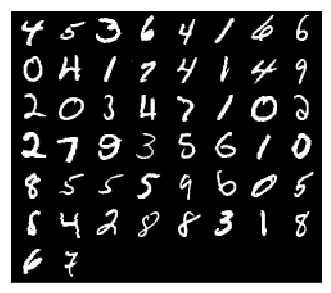

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=6, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=6, bias=False)
  (fc_classif_1): Linear(in_features=2, out_features=256, bias=True)
  (fc_classif_2): Linear(in_features=256, out_features=10, bias=False)
  (fc_z_d1): Linear(in_features=256, out_features=64, bias=True)
  (fc_z_d2): Linear(in_features=256, out_features=64, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	classif Loss: 147.99	BCE_loss: 2847.55	KL: 0.00	Accuracy: 0.22
	Train Epoch: 1 [500/60000 (1%)]	classif Loss: 149.87	BCE_loss: 1648.39	KL: 1.17	Accuracy: 0.14
	Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 150.47	BCE_loss: 647.99	KL: 4.32	Accuracy: 0.12
	Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 146.52	BCE_loss: 477.74	KL: 0.05	Accuracy: 0.14
	Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 148.40	BCE_loss: 453.47	KL: 0.00	Accuracy: 0.08
	Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 147.10	BCE_loss: 491.02	KL: 0.00	Accuracy: 0.12
	Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 147.55	BCE_loss: 462.74	KL: 0.00	Accuracy: 0.10
	Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 148.60	BCE_loss: 413.56	KL: 0.03	Accuracy: 0.02
	Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 148.21	BCE_loss: 468.08	KL: 0.24	Accuracy: 0.12
	Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 146.86	BCE_loss: 429.73	KL: 0.99	Accuracy: 0.20
	Train Epoch: 1 [5000/60000 (8

	Train Epoch: 1 [42000/60000 (70%)]	classif Loss: 116.59	BCE_loss: 275.15	KL: 24.40	Accuracy: 0.28
	Train Epoch: 1 [42500/60000 (71%)]	classif Loss: 130.74	BCE_loss: 283.33	KL: 27.72	Accuracy: 0.16
	Train Epoch: 1 [43000/60000 (72%)]	classif Loss: 126.59	BCE_loss: 272.83	KL: 25.02	Accuracy: 0.18
	Train Epoch: 1 [43500/60000 (72%)]	classif Loss: 142.83	BCE_loss: 273.23	KL: 26.41	Accuracy: 0.14
	Train Epoch: 1 [44000/60000 (73%)]	classif Loss: 121.60	BCE_loss: 271.96	KL: 26.46	Accuracy: 0.20
	Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 120.84	BCE_loss: 267.20	KL: 27.03	Accuracy: 0.24
	Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 121.33	BCE_loss: 275.36	KL: 30.17	Accuracy: 0.28
	Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 121.13	BCE_loss: 273.85	KL: 27.95	Accuracy: 0.16
	Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 124.03	BCE_loss: 258.79	KL: 26.89	Accuracy: 0.26
	Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 130.40	BCE_loss: 274.59	KL: 29.22	Accuracy: 0.16
	Train Epo

	Train Epoch: 2 [24000/60000 (40%)]	classif Loss: 102.69	BCE_loss: 222.12	KL: 32.72	Accuracy: 0.18
	Train Epoch: 2 [24500/60000 (41%)]	classif Loss: 104.25	BCE_loss: 219.37	KL: 33.68	Accuracy: 0.44
	Train Epoch: 2 [25000/60000 (42%)]	classif Loss: 102.40	BCE_loss: 236.56	KL: 34.27	Accuracy: 0.32
	Train Epoch: 2 [25500/60000 (42%)]	classif Loss: 113.39	BCE_loss: 222.69	KL: 32.46	Accuracy: 0.36
	Train Epoch: 2 [26000/60000 (43%)]	classif Loss: 110.91	BCE_loss: 225.79	KL: 33.45	Accuracy: 0.26
	Train Epoch: 2 [26500/60000 (44%)]	classif Loss: 118.48	BCE_loss: 216.96	KL: 32.37	Accuracy: 0.28
	Train Epoch: 2 [27000/60000 (45%)]	classif Loss: 118.74	BCE_loss: 238.89	KL: 30.94	Accuracy: 0.22
	Train Epoch: 2 [27500/60000 (46%)]	classif Loss: 101.99	BCE_loss: 215.31	KL: 33.43	Accuracy: 0.48
	Train Epoch: 2 [28000/60000 (47%)]	classif Loss: 114.83	BCE_loss: 232.02	KL: 32.75	Accuracy: 0.28
	Train Epoch: 2 [28500/60000 (48%)]	classif Loss: 112.52	BCE_loss: 226.03	KL: 32.90	Accuracy: 0.20
	Train Epo

	Train Epoch: 3 [6000/60000 (10%)]	classif Loss: 107.64	BCE_loss: 218.22	KL: 32.23	Accuracy: 0.40
	Train Epoch: 3 [6500/60000 (11%)]	classif Loss: 95.88	BCE_loss: 205.22	KL: 35.09	Accuracy: 0.48
	Train Epoch: 3 [7000/60000 (12%)]	classif Loss: 101.89	BCE_loss: 223.30	KL: 33.36	Accuracy: 0.28
	Train Epoch: 3 [7500/60000 (12%)]	classif Loss: 94.13	BCE_loss: 213.50	KL: 34.04	Accuracy: 0.30
	Train Epoch: 3 [8000/60000 (13%)]	classif Loss: 102.83	BCE_loss: 242.94	KL: 34.16	Accuracy: 0.34
	Train Epoch: 3 [8500/60000 (14%)]	classif Loss: 98.23	BCE_loss: 221.53	KL: 35.52	Accuracy: 0.42
	Train Epoch: 3 [9000/60000 (15%)]	classif Loss: 102.15	BCE_loss: 213.57	KL: 35.87	Accuracy: 0.32
	Train Epoch: 3 [9500/60000 (16%)]	classif Loss: 101.14	BCE_loss: 221.13	KL: 33.88	Accuracy: 0.30
	Train Epoch: 3 [10000/60000 (17%)]	classif Loss: 97.79	BCE_loss: 223.87	KL: 33.90	Accuracy: 0.40
	Train Epoch: 3 [10500/60000 (18%)]	classif Loss: 105.02	BCE_loss: 221.04	KL: 34.45	Accuracy: 0.34
	Train Epoch: 3 [11000

	Train Epoch: 3 [48000/60000 (80%)]	classif Loss: 101.01	BCE_loss: 226.91	KL: 34.15	Accuracy: 0.30
	Train Epoch: 3 [48500/60000 (81%)]	classif Loss: 99.57	BCE_loss: 228.91	KL: 33.83	Accuracy: 0.32
	Train Epoch: 3 [49000/60000 (82%)]	classif Loss: 111.21	BCE_loss: 231.09	KL: 33.94	Accuracy: 0.40
	Train Epoch: 3 [49500/60000 (82%)]	classif Loss: 102.73	BCE_loss: 210.72	KL: 34.21	Accuracy: 0.30
	Train Epoch: 3 [50000/60000 (83%)]	classif Loss: 97.62	BCE_loss: 217.87	KL: 33.89	Accuracy: 0.36
	Train Epoch: 3 [50500/60000 (84%)]	classif Loss: 94.57	BCE_loss: 216.36	KL: 34.68	Accuracy: 0.40
	Train Epoch: 3 [51000/60000 (85%)]	classif Loss: 96.86	BCE_loss: 209.29	KL: 37.00	Accuracy: 0.40
	Train Epoch: 3 [51500/60000 (86%)]	classif Loss: 96.14	BCE_loss: 217.21	KL: 35.77	Accuracy: 0.40
	Train Epoch: 3 [52000/60000 (87%)]	classif Loss: 103.66	BCE_loss: 230.91	KL: 33.72	Accuracy: 0.38
	Train Epoch: 3 [52500/60000 (88%)]	classif Loss: 100.96	BCE_loss: 226.95	KL: 35.49	Accuracy: 0.36
	Train Epoch: 3

	Train Epoch: 4 [30000/60000 (50%)]	classif Loss: 85.95	BCE_loss: 227.16	KL: 37.61	Accuracy: 0.46
	Train Epoch: 4 [30500/60000 (51%)]	classif Loss: 82.73	BCE_loss: 218.92	KL: 36.11	Accuracy: 0.46
	Train Epoch: 4 [31000/60000 (52%)]	classif Loss: 89.61	BCE_loss: 215.81	KL: 36.72	Accuracy: 0.38
	Train Epoch: 4 [31500/60000 (52%)]	classif Loss: 80.74	BCE_loss: 225.41	KL: 34.94	Accuracy: 0.54
	Train Epoch: 4 [32000/60000 (53%)]	classif Loss: 96.58	BCE_loss: 224.20	KL: 34.89	Accuracy: 0.40
	Train Epoch: 4 [32500/60000 (54%)]	classif Loss: 96.97	BCE_loss: 228.82	KL: 36.95	Accuracy: 0.42
	Train Epoch: 4 [33000/60000 (55%)]	classif Loss: 89.89	BCE_loss: 225.77	KL: 34.41	Accuracy: 0.30
	Train Epoch: 4 [33500/60000 (56%)]	classif Loss: 89.84	BCE_loss: 214.82	KL: 37.24	Accuracy: 0.50
	Train Epoch: 4 [34000/60000 (57%)]	classif Loss: 85.70	BCE_loss: 209.20	KL: 36.51	Accuracy: 0.44
	Train Epoch: 4 [34500/60000 (58%)]	classif Loss: 91.40	BCE_loss: 220.35	KL: 35.60	Accuracy: 0.38
	Train Epoch: 4 [350

	Train Epoch: 5 [12000/60000 (20%)]	classif Loss: 86.81	BCE_loss: 217.29	KL: 36.04	Accuracy: 0.36
	Train Epoch: 5 [12500/60000 (21%)]	classif Loss: 76.02	BCE_loss: 221.14	KL: 36.40	Accuracy: 0.42
	Train Epoch: 5 [13000/60000 (22%)]	classif Loss: 102.23	BCE_loss: 223.02	KL: 35.64	Accuracy: 0.30
	Train Epoch: 5 [13500/60000 (22%)]	classif Loss: 96.91	BCE_loss: 220.86	KL: 35.19	Accuracy: 0.38
	Train Epoch: 5 [14000/60000 (23%)]	classif Loss: 82.44	BCE_loss: 227.74	KL: 34.12	Accuracy: 0.48
	Train Epoch: 5 [14500/60000 (24%)]	classif Loss: 88.91	BCE_loss: 221.50	KL: 36.01	Accuracy: 0.50
	Train Epoch: 5 [15000/60000 (25%)]	classif Loss: 88.67	BCE_loss: 218.52	KL: 35.36	Accuracy: 0.38
	Train Epoch: 5 [15500/60000 (26%)]	classif Loss: 83.18	BCE_loss: 219.83	KL: 37.49	Accuracy: 0.48
	Train Epoch: 5 [16000/60000 (27%)]	classif Loss: 84.84	BCE_loss: 212.80	KL: 37.02	Accuracy: 0.40
	Train Epoch: 5 [16500/60000 (28%)]	classif Loss: 84.66	BCE_loss: 218.95	KL: 36.61	Accuracy: 0.50
	Train Epoch: 5 [17

	Train Epoch: 5 [54000/60000 (90%)]	classif Loss: 84.61	BCE_loss: 214.63	KL: 34.82	Accuracy: 0.42
	Train Epoch: 5 [54500/60000 (91%)]	classif Loss: 78.05	BCE_loss: 210.88	KL: 34.85	Accuracy: 0.48
	Train Epoch: 5 [55000/60000 (92%)]	classif Loss: 77.20	BCE_loss: 212.82	KL: 35.43	Accuracy: 0.42
	Train Epoch: 5 [55500/60000 (92%)]	classif Loss: 81.25	BCE_loss: 223.60	KL: 37.12	Accuracy: 0.48
	Train Epoch: 5 [56000/60000 (93%)]	classif Loss: 92.68	BCE_loss: 210.15	KL: 36.24	Accuracy: 0.42
	Train Epoch: 5 [56500/60000 (94%)]	classif Loss: 88.08	BCE_loss: 214.30	KL: 35.00	Accuracy: 0.38
	Train Epoch: 5 [57000/60000 (95%)]	classif Loss: 84.38	BCE_loss: 227.18	KL: 36.82	Accuracy: 0.54
	Train Epoch: 5 [57500/60000 (96%)]	classif Loss: 91.95	BCE_loss: 212.14	KL: 34.24	Accuracy: 0.42
	Train Epoch: 5 [58000/60000 (97%)]	classif Loss: 83.77	BCE_loss: 215.49	KL: 36.50	Accuracy: 0.46
	Train Epoch: 5 [58500/60000 (98%)]	classif Loss: 77.63	BCE_loss: 197.73	KL: 36.21	Accuracy: 0.56
	Train Epoch: 5 [590

	Train Epoch: 6 [36000/60000 (60%)]	classif Loss: 96.57	BCE_loss: 208.55	KL: 36.00	Accuracy: 0.44
	Train Epoch: 6 [36500/60000 (61%)]	classif Loss: 90.42	BCE_loss: 206.61	KL: 37.66	Accuracy: 0.48
	Train Epoch: 6 [37000/60000 (62%)]	classif Loss: 90.57	BCE_loss: 222.08	KL: 37.42	Accuracy: 0.50
	Train Epoch: 6 [37500/60000 (62%)]	classif Loss: 103.17	BCE_loss: 212.02	KL: 34.40	Accuracy: 0.40
	Train Epoch: 6 [38000/60000 (63%)]	classif Loss: 80.17	BCE_loss: 214.69	KL: 37.69	Accuracy: 0.42
	Train Epoch: 6 [38500/60000 (64%)]	classif Loss: 95.68	BCE_loss: 209.53	KL: 37.26	Accuracy: 0.40
	Train Epoch: 6 [39000/60000 (65%)]	classif Loss: 74.40	BCE_loss: 223.62	KL: 36.96	Accuracy: 0.54
	Train Epoch: 6 [39500/60000 (66%)]	classif Loss: 80.57	BCE_loss: 208.53	KL: 37.14	Accuracy: 0.44
	Train Epoch: 6 [40000/60000 (67%)]	classif Loss: 94.64	BCE_loss: 212.40	KL: 35.53	Accuracy: 0.26
	Train Epoch: 6 [40500/60000 (68%)]	classif Loss: 94.68	BCE_loss: 215.09	KL: 35.68	Accuracy: 0.40
	Train Epoch: 6 [41

	Train Epoch: 7 [18000/60000 (30%)]	classif Loss: 82.25	BCE_loss: 218.46	KL: 36.72	Accuracy: 0.42
	Train Epoch: 7 [18500/60000 (31%)]	classif Loss: 78.38	BCE_loss: 217.64	KL: 37.59	Accuracy: 0.52
	Train Epoch: 7 [19000/60000 (32%)]	classif Loss: 87.06	BCE_loss: 220.44	KL: 37.71	Accuracy: 0.36
	Train Epoch: 7 [19500/60000 (32%)]	classif Loss: 78.74	BCE_loss: 205.61	KL: 34.99	Accuracy: 0.44
	Train Epoch: 7 [20000/60000 (33%)]	classif Loss: 76.01	BCE_loss: 214.75	KL: 36.22	Accuracy: 0.42
	Train Epoch: 7 [20500/60000 (34%)]	classif Loss: 78.31	BCE_loss: 228.43	KL: 35.77	Accuracy: 0.42
	Train Epoch: 7 [21000/60000 (35%)]	classif Loss: 83.15	BCE_loss: 220.79	KL: 38.13	Accuracy: 0.48
	Train Epoch: 7 [21500/60000 (36%)]	classif Loss: 94.43	BCE_loss: 209.72	KL: 38.15	Accuracy: 0.46
	Train Epoch: 7 [22000/60000 (37%)]	classif Loss: 73.47	BCE_loss: 213.61	KL: 37.25	Accuracy: 0.42
	Train Epoch: 7 [22500/60000 (38%)]	classif Loss: 102.68	BCE_loss: 214.78	KL: 36.68	Accuracy: 0.44
	Train Epoch: 7 [23

	Train Epoch: 8 [0/60000 (0%)]	classif Loss: 78.62	BCE_loss: 225.34	KL: 38.10	Accuracy: 0.56
	Train Epoch: 8 [500/60000 (1%)]	classif Loss: 68.24	BCE_loss: 212.21	KL: 37.30	Accuracy: 0.48
	Train Epoch: 8 [1000/60000 (2%)]	classif Loss: 60.05	BCE_loss: 204.11	KL: 38.58	Accuracy: 0.64
	Train Epoch: 8 [1500/60000 (2%)]	classif Loss: 81.63	BCE_loss: 219.63	KL: 37.83	Accuracy: 0.54
	Train Epoch: 8 [2000/60000 (3%)]	classif Loss: 92.56	BCE_loss: 216.30	KL: 37.71	Accuracy: 0.40
	Train Epoch: 8 [2500/60000 (4%)]	classif Loss: 75.11	BCE_loss: 209.23	KL: 36.07	Accuracy: 0.52
	Train Epoch: 8 [3000/60000 (5%)]	classif Loss: 87.37	BCE_loss: 225.99	KL: 37.08	Accuracy: 0.40
	Train Epoch: 8 [3500/60000 (6%)]	classif Loss: 72.50	BCE_loss: 207.48	KL: 37.54	Accuracy: 0.66
	Train Epoch: 8 [4000/60000 (7%)]	classif Loss: 81.14	BCE_loss: 210.79	KL: 36.49	Accuracy: 0.36
	Train Epoch: 8 [4500/60000 (8%)]	classif Loss: 75.89	BCE_loss: 197.51	KL: 35.18	Accuracy: 0.54
	Train Epoch: 8 [5000/60000 (8%)]	classif Lo

	Train Epoch: 8 [42000/60000 (70%)]	classif Loss: 78.12	BCE_loss: 223.11	KL: 38.20	Accuracy: 0.48
	Train Epoch: 8 [42500/60000 (71%)]	classif Loss: 83.99	BCE_loss: 208.47	KL: 38.84	Accuracy: 0.56
	Train Epoch: 8 [43000/60000 (72%)]	classif Loss: 80.62	BCE_loss: 211.40	KL: 37.54	Accuracy: 0.38
	Train Epoch: 8 [43500/60000 (72%)]	classif Loss: 98.76	BCE_loss: 215.88	KL: 36.97	Accuracy: 0.50
	Train Epoch: 8 [44000/60000 (73%)]	classif Loss: 80.31	BCE_loss: 215.41	KL: 37.96	Accuracy: 0.40
	Train Epoch: 8 [44500/60000 (74%)]	classif Loss: 84.50	BCE_loss: 210.38	KL: 36.80	Accuracy: 0.48
	Train Epoch: 8 [45000/60000 (75%)]	classif Loss: 72.08	BCE_loss: 217.67	KL: 37.12	Accuracy: 0.60
	Train Epoch: 8 [45500/60000 (76%)]	classif Loss: 73.86	BCE_loss: 213.44	KL: 37.70	Accuracy: 0.56
	Train Epoch: 8 [46000/60000 (77%)]	classif Loss: 79.44	BCE_loss: 228.01	KL: 36.43	Accuracy: 0.38
	Train Epoch: 8 [46500/60000 (78%)]	classif Loss: 89.83	BCE_loss: 216.87	KL: 38.13	Accuracy: 0.40
	Train Epoch: 8 [470

	Train Epoch: 9 [24000/60000 (40%)]	classif Loss: 74.15	BCE_loss: 219.73	KL: 39.18	Accuracy: 0.50
	Train Epoch: 9 [24500/60000 (41%)]	classif Loss: 82.64	BCE_loss: 210.36	KL: 38.17	Accuracy: 0.54
	Train Epoch: 9 [25000/60000 (42%)]	classif Loss: 71.09	BCE_loss: 205.58	KL: 39.59	Accuracy: 0.50
	Train Epoch: 9 [25500/60000 (42%)]	classif Loss: 77.49	BCE_loss: 213.55	KL: 36.90	Accuracy: 0.54
	Train Epoch: 9 [26000/60000 (43%)]	classif Loss: 88.46	BCE_loss: 208.12	KL: 37.20	Accuracy: 0.60
	Train Epoch: 9 [26500/60000 (44%)]	classif Loss: 84.21	BCE_loss: 234.75	KL: 39.75	Accuracy: 0.50
	Train Epoch: 9 [27000/60000 (45%)]	classif Loss: 82.41	BCE_loss: 204.08	KL: 37.61	Accuracy: 0.54
	Train Epoch: 9 [27500/60000 (46%)]	classif Loss: 81.30	BCE_loss: 200.59	KL: 37.69	Accuracy: 0.48
	Train Epoch: 9 [28000/60000 (47%)]	classif Loss: 62.01	BCE_loss: 208.25	KL: 39.35	Accuracy: 0.68
	Train Epoch: 9 [28500/60000 (48%)]	classif Loss: 85.35	BCE_loss: 205.94	KL: 39.38	Accuracy: 0.38
	Train Epoch: 9 [290

	Train Epoch: 10 [6000/60000 (10%)]	classif Loss: 80.15	BCE_loss: 202.99	KL: 39.03	Accuracy: 0.44
	Train Epoch: 10 [6500/60000 (11%)]	classif Loss: 73.06	BCE_loss: 219.86	KL: 37.43	Accuracy: 0.52
	Train Epoch: 10 [7000/60000 (12%)]	classif Loss: 86.35	BCE_loss: 220.39	KL: 37.29	Accuracy: 0.48
	Train Epoch: 10 [7500/60000 (12%)]	classif Loss: 75.52	BCE_loss: 217.04	KL: 36.68	Accuracy: 0.38
	Train Epoch: 10 [8000/60000 (13%)]	classif Loss: 84.71	BCE_loss: 215.06	KL: 39.59	Accuracy: 0.56
	Train Epoch: 10 [8500/60000 (14%)]	classif Loss: 92.82	BCE_loss: 217.07	KL: 38.15	Accuracy: 0.42
	Train Epoch: 10 [9000/60000 (15%)]	classif Loss: 89.69	BCE_loss: 213.93	KL: 39.10	Accuracy: 0.46
	Train Epoch: 10 [9500/60000 (16%)]	classif Loss: 83.43	BCE_loss: 211.38	KL: 37.50	Accuracy: 0.54
	Train Epoch: 10 [10000/60000 (17%)]	classif Loss: 77.25	BCE_loss: 203.13	KL: 37.06	Accuracy: 0.42
	Train Epoch: 10 [10500/60000 (18%)]	classif Loss: 71.05	BCE_loss: 218.13	KL: 38.14	Accuracy: 0.62
	Train Epoch: 10 [

	Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 95.18	BCE_loss: 230.94	KL: 38.47	Accuracy: 0.56
	Train Epoch: 10 [48000/60000 (80%)]	classif Loss: 87.74	BCE_loss: 207.74	KL: 36.96	Accuracy: 0.42
	Train Epoch: 10 [48500/60000 (81%)]	classif Loss: 79.57	BCE_loss: 209.20	KL: 36.86	Accuracy: 0.48
	Train Epoch: 10 [49000/60000 (82%)]	classif Loss: 61.65	BCE_loss: 199.93	KL: 39.00	Accuracy: 0.60
	Train Epoch: 10 [49500/60000 (82%)]	classif Loss: 73.05	BCE_loss: 202.40	KL: 38.10	Accuracy: 0.48
	Train Epoch: 10 [50000/60000 (83%)]	classif Loss: 71.26	BCE_loss: 210.38	KL: 40.04	Accuracy: 0.56
	Train Epoch: 10 [50500/60000 (84%)]	classif Loss: 70.19	BCE_loss: 219.54	KL: 40.29	Accuracy: 0.52
	Train Epoch: 10 [51000/60000 (85%)]	classif Loss: 68.38	BCE_loss: 202.06	KL: 37.27	Accuracy: 0.42
	Train Epoch: 10 [51500/60000 (86%)]	classif Loss: 72.25	BCE_loss: 215.10	KL: 39.47	Accuracy: 0.52
	Train Epoch: 10 [52000/60000 (87%)]	classif Loss: 89.17	BCE_loss: 205.02	KL: 37.18	Accuracy: 0.52
	Train Epo

	Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 84.96	BCE_loss: 200.34	KL: 36.82	Accuracy: 0.52
	Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 71.52	BCE_loss: 197.47	KL: 39.49	Accuracy: 0.52
	Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 65.65	BCE_loss: 206.15	KL: 38.88	Accuracy: 0.64
	Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 95.21	BCE_loss: 211.37	KL: 37.08	Accuracy: 0.40
	Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 76.07	BCE_loss: 216.13	KL: 37.53	Accuracy: 0.48
	Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 63.92	BCE_loss: 205.37	KL: 38.02	Accuracy: 0.52
	Train Epoch: 11 [32500/60000 (54%)]	classif Loss: 69.35	BCE_loss: 218.52	KL: 41.32	Accuracy: 0.48
	Train Epoch: 11 [33000/60000 (55%)]	classif Loss: 63.84	BCE_loss: 201.89	KL: 39.79	Accuracy: 0.56
	Train Epoch: 11 [33500/60000 (56%)]	classif Loss: 71.81	BCE_loss: 211.19	KL: 38.40	Accuracy: 0.50
	Train Epoch: 11 [34000/60000 (57%)]	classif Loss: 86.16	BCE_loss: 210.92	KL: 39.40	Accuracy: 0.42
	Train Epo

	Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 74.68	BCE_loss: 213.30	KL: 37.34	Accuracy: 0.54
	Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 59.70	BCE_loss: 195.36	KL: 39.57	Accuracy: 0.54
	Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 61.34	BCE_loss: 201.37	KL: 37.21	Accuracy: 0.56
	Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 62.89	BCE_loss: 204.02	KL: 36.58	Accuracy: 0.50
	Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 81.79	BCE_loss: 211.61	KL: 38.45	Accuracy: 0.48
	Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 78.88	BCE_loss: 217.61	KL: 36.67	Accuracy: 0.50
	Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 68.24	BCE_loss: 216.49	KL: 38.24	Accuracy: 0.48
	Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 79.92	BCE_loss: 217.04	KL: 38.53	Accuracy: 0.54
	Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 74.39	BCE_loss: 217.78	KL: 38.61	Accuracy: 0.48
	Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 88.16	BCE_loss: 209.62	KL: 37.21	Accuracy: 0.44
	Train Epo

	Train Epoch: 12 [53000/60000 (88%)]	classif Loss: 71.42	BCE_loss: 207.18	KL: 39.43	Accuracy: 0.52
	Train Epoch: 12 [53500/60000 (89%)]	classif Loss: 70.79	BCE_loss: 213.65	KL: 38.43	Accuracy: 0.60
	Train Epoch: 12 [54000/60000 (90%)]	classif Loss: 63.94	BCE_loss: 208.92	KL: 39.12	Accuracy: 0.64
	Train Epoch: 12 [54500/60000 (91%)]	classif Loss: 77.93	BCE_loss: 207.32	KL: 38.50	Accuracy: 0.48
	Train Epoch: 12 [55000/60000 (92%)]	classif Loss: 78.48	BCE_loss: 209.99	KL: 37.66	Accuracy: 0.48
	Train Epoch: 12 [55500/60000 (92%)]	classif Loss: 66.86	BCE_loss: 211.14	KL: 37.89	Accuracy: 0.64
	Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 83.52	BCE_loss: 213.10	KL: 38.29	Accuracy: 0.46
	Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 75.43	BCE_loss: 204.55	KL: 37.86	Accuracy: 0.52
	Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 86.75	BCE_loss: 209.31	KL: 38.74	Accuracy: 0.54
	Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 70.99	BCE_loss: 212.89	KL: 38.08	Accuracy: 0.48
	Train Epo

	Train Epoch: 13 [35000/60000 (58%)]	classif Loss: 86.13	BCE_loss: 213.68	KL: 41.37	Accuracy: 0.44
	Train Epoch: 13 [35500/60000 (59%)]	classif Loss: 85.49	BCE_loss: 211.21	KL: 38.20	Accuracy: 0.40
	Train Epoch: 13 [36000/60000 (60%)]	classif Loss: 68.87	BCE_loss: 216.33	KL: 38.86	Accuracy: 0.60
	Train Epoch: 13 [36500/60000 (61%)]	classif Loss: 77.45	BCE_loss: 215.21	KL: 40.94	Accuracy: 0.54
	Train Epoch: 13 [37000/60000 (62%)]	classif Loss: 76.10	BCE_loss: 204.60	KL: 38.73	Accuracy: 0.46
	Train Epoch: 13 [37500/60000 (62%)]	classif Loss: 68.46	BCE_loss: 204.27	KL: 40.48	Accuracy: 0.64
	Train Epoch: 13 [38000/60000 (63%)]	classif Loss: 84.34	BCE_loss: 219.20	KL: 38.73	Accuracy: 0.54
	Train Epoch: 13 [38500/60000 (64%)]	classif Loss: 65.81	BCE_loss: 206.50	KL: 36.23	Accuracy: 0.56
	Train Epoch: 13 [39000/60000 (65%)]	classif Loss: 83.58	BCE_loss: 210.67	KL: 36.73	Accuracy: 0.40
	Train Epoch: 13 [39500/60000 (66%)]	classif Loss: 72.24	BCE_loss: 211.38	KL: 37.72	Accuracy: 0.44
	Train Epo

	Train Epoch: 14 [17000/60000 (28%)]	classif Loss: 71.72	BCE_loss: 205.67	KL: 40.97	Accuracy: 0.60
	Train Epoch: 14 [17500/60000 (29%)]	classif Loss: 82.55	BCE_loss: 223.68	KL: 39.08	Accuracy: 0.48
	Train Epoch: 14 [18000/60000 (30%)]	classif Loss: 72.51	BCE_loss: 207.45	KL: 39.01	Accuracy: 0.52
	Train Epoch: 14 [18500/60000 (31%)]	classif Loss: 70.17	BCE_loss: 211.49	KL: 38.37	Accuracy: 0.50
	Train Epoch: 14 [19000/60000 (32%)]	classif Loss: 57.92	BCE_loss: 201.81	KL: 37.24	Accuracy: 0.54
	Train Epoch: 14 [19500/60000 (32%)]	classif Loss: 57.01	BCE_loss: 211.46	KL: 40.21	Accuracy: 0.60
	Train Epoch: 14 [20000/60000 (33%)]	classif Loss: 70.40	BCE_loss: 216.19	KL: 40.45	Accuracy: 0.56
	Train Epoch: 14 [20500/60000 (34%)]	classif Loss: 79.62	BCE_loss: 199.58	KL: 38.34	Accuracy: 0.50
	Train Epoch: 14 [21000/60000 (35%)]	classif Loss: 76.68	BCE_loss: 213.09	KL: 37.95	Accuracy: 0.58
	Train Epoch: 14 [21500/60000 (36%)]	classif Loss: 60.13	BCE_loss: 207.71	KL: 39.36	Accuracy: 0.48
	Train Epo

	Train Epoch: 14 [58500/60000 (98%)]	classif Loss: 58.50	BCE_loss: 206.98	KL: 40.25	Accuracy: 0.56
	Train Epoch: 14 [59000/60000 (98%)]	classif Loss: 69.69	BCE_loss: 212.72	KL: 38.89	Accuracy: 0.50
	Train Epoch: 14 [59500/60000 (99%)]	classif Loss: 52.30	BCE_loss: 198.02	KL: 37.92	Accuracy: 0.60
	Train Epoch: 15 [0/60000 (0%)]	classif Loss: 80.82	BCE_loss: 205.94	KL: 39.27	Accuracy: 0.50
	Train Epoch: 15 [500/60000 (1%)]	classif Loss: 67.39	BCE_loss: 206.78	KL: 40.44	Accuracy: 0.52
	Train Epoch: 15 [1000/60000 (2%)]	classif Loss: 73.13	BCE_loss: 196.15	KL: 39.05	Accuracy: 0.58
	Train Epoch: 15 [1500/60000 (2%)]	classif Loss: 59.63	BCE_loss: 199.02	KL: 38.11	Accuracy: 0.56
	Train Epoch: 15 [2000/60000 (3%)]	classif Loss: 68.81	BCE_loss: 208.66	KL: 38.97	Accuracy: 0.52
	Train Epoch: 15 [2500/60000 (4%)]	classif Loss: 79.54	BCE_loss: 210.14	KL: 38.77	Accuracy: 0.40
	Train Epoch: 15 [3000/60000 (5%)]	classif Loss: 64.24	BCE_loss: 219.24	KL: 37.20	Accuracy: 0.52
	Train Epoch: 15 [3500/60000

	Train Epoch: 15 [40500/60000 (68%)]	classif Loss: 66.14	BCE_loss: 200.77	KL: 39.25	Accuracy: 0.68
	Train Epoch: 15 [41000/60000 (68%)]	classif Loss: 61.31	BCE_loss: 210.38	KL: 39.72	Accuracy: 0.66
	Train Epoch: 15 [41500/60000 (69%)]	classif Loss: 81.24	BCE_loss: 193.04	KL: 37.50	Accuracy: 0.54
	Train Epoch: 15 [42000/60000 (70%)]	classif Loss: 70.60	BCE_loss: 204.45	KL: 39.71	Accuracy: 0.62
	Train Epoch: 15 [42500/60000 (71%)]	classif Loss: 60.08	BCE_loss: 196.13	KL: 38.04	Accuracy: 0.68
	Train Epoch: 15 [43000/60000 (72%)]	classif Loss: 75.61	BCE_loss: 217.24	KL: 38.34	Accuracy: 0.50
	Train Epoch: 15 [43500/60000 (72%)]	classif Loss: 66.91	BCE_loss: 201.60	KL: 40.29	Accuracy: 0.62
	Train Epoch: 15 [44000/60000 (73%)]	classif Loss: 58.74	BCE_loss: 224.66	KL: 39.42	Accuracy: 0.58
	Train Epoch: 15 [44500/60000 (74%)]	classif Loss: 64.63	BCE_loss: 214.28	KL: 36.84	Accuracy: 0.60
	Train Epoch: 15 [45000/60000 (75%)]	classif Loss: 75.40	BCE_loss: 197.15	KL: 38.51	Accuracy: 0.54
	Train Epo

	Train Epoch: 16 [22500/60000 (38%)]	classif Loss: 70.02	BCE_loss: 207.88	KL: 39.06	Accuracy: 0.46
	Train Epoch: 16 [23000/60000 (38%)]	classif Loss: 47.12	BCE_loss: 200.60	KL: 40.74	Accuracy: 0.62
	Train Epoch: 16 [23500/60000 (39%)]	classif Loss: 76.29	BCE_loss: 211.78	KL: 36.49	Accuracy: 0.58
	Train Epoch: 16 [24000/60000 (40%)]	classif Loss: 65.99	BCE_loss: 206.55	KL: 36.98	Accuracy: 0.54
	Train Epoch: 16 [24500/60000 (41%)]	classif Loss: 67.05	BCE_loss: 210.36	KL: 37.42	Accuracy: 0.62
	Train Epoch: 16 [25000/60000 (42%)]	classif Loss: 74.60	BCE_loss: 196.72	KL: 39.00	Accuracy: 0.56
	Train Epoch: 16 [25500/60000 (42%)]	classif Loss: 64.07	BCE_loss: 221.49	KL: 40.39	Accuracy: 0.62
	Train Epoch: 16 [26000/60000 (43%)]	classif Loss: 75.10	BCE_loss: 210.59	KL: 40.25	Accuracy: 0.50
	Train Epoch: 16 [26500/60000 (44%)]	classif Loss: 73.76	BCE_loss: 199.52	KL: 38.29	Accuracy: 0.50
	Train Epoch: 16 [27000/60000 (45%)]	classif Loss: 81.76	BCE_loss: 224.07	KL: 37.71	Accuracy: 0.54
	Train Epo

	Train Epoch: 17 [4000/60000 (7%)]	classif Loss: 64.26	BCE_loss: 211.14	KL: 39.46	Accuracy: 0.62
	Train Epoch: 17 [4500/60000 (8%)]	classif Loss: 67.46	BCE_loss: 219.64	KL: 37.00	Accuracy: 0.52
	Train Epoch: 17 [5000/60000 (8%)]	classif Loss: 70.79	BCE_loss: 195.03	KL: 40.15	Accuracy: 0.54
	Train Epoch: 17 [5500/60000 (9%)]	classif Loss: 66.08	BCE_loss: 204.61	KL: 40.42	Accuracy: 0.58
	Train Epoch: 17 [6000/60000 (10%)]	classif Loss: 75.61	BCE_loss: 204.49	KL: 38.50	Accuracy: 0.54
	Train Epoch: 17 [6500/60000 (11%)]	classif Loss: 74.63	BCE_loss: 216.85	KL: 40.90	Accuracy: 0.58
	Train Epoch: 17 [7000/60000 (12%)]	classif Loss: 62.62	BCE_loss: 206.82	KL: 38.52	Accuracy: 0.62
	Train Epoch: 17 [7500/60000 (12%)]	classif Loss: 68.06	BCE_loss: 211.37	KL: 38.83	Accuracy: 0.56
	Train Epoch: 17 [8000/60000 (13%)]	classif Loss: 73.05	BCE_loss: 206.89	KL: 39.83	Accuracy: 0.52
	Train Epoch: 17 [8500/60000 (14%)]	classif Loss: 61.18	BCE_loss: 210.22	KL: 39.78	Accuracy: 0.66
	Train Epoch: 17 [9000/6

	Train Epoch: 17 [45500/60000 (76%)]	classif Loss: 70.66	BCE_loss: 231.42	KL: 38.68	Accuracy: 0.48
	Train Epoch: 17 [46000/60000 (77%)]	classif Loss: 70.62	BCE_loss: 218.89	KL: 39.45	Accuracy: 0.60
	Train Epoch: 17 [46500/60000 (78%)]	classif Loss: 58.79	BCE_loss: 206.62	KL: 38.78	Accuracy: 0.64
	Train Epoch: 17 [47000/60000 (78%)]	classif Loss: 60.14	BCE_loss: 201.90	KL: 40.57	Accuracy: 0.60
	Train Epoch: 17 [47500/60000 (79%)]	classif Loss: 68.16	BCE_loss: 212.22	KL: 38.86	Accuracy: 0.60
	Train Epoch: 17 [48000/60000 (80%)]	classif Loss: 76.69	BCE_loss: 208.29	KL: 38.68	Accuracy: 0.54
	Train Epoch: 17 [48500/60000 (81%)]	classif Loss: 80.94	BCE_loss: 209.13	KL: 38.53	Accuracy: 0.44
	Train Epoch: 17 [49000/60000 (82%)]	classif Loss: 68.26	BCE_loss: 217.51	KL: 40.33	Accuracy: 0.48
	Train Epoch: 17 [49500/60000 (82%)]	classif Loss: 49.27	BCE_loss: 206.01	KL: 40.52	Accuracy: 0.70
	Train Epoch: 17 [50000/60000 (83%)]	classif Loss: 88.68	BCE_loss: 205.30	KL: 41.31	Accuracy: 0.50
	Train Epo

	Train Epoch: 18 [27500/60000 (46%)]	classif Loss: 63.67	BCE_loss: 204.35	KL: 41.41	Accuracy: 0.56
	Train Epoch: 18 [28000/60000 (47%)]	classif Loss: 54.69	BCE_loss: 213.17	KL: 40.98	Accuracy: 0.68
	Train Epoch: 18 [28500/60000 (48%)]	classif Loss: 68.03	BCE_loss: 192.93	KL: 37.64	Accuracy: 0.54
	Train Epoch: 18 [29000/60000 (48%)]	classif Loss: 76.54	BCE_loss: 202.33	KL: 39.46	Accuracy: 0.54
	Train Epoch: 18 [29500/60000 (49%)]	classif Loss: 77.25	BCE_loss: 208.86	KL: 38.76	Accuracy: 0.58
	Train Epoch: 18 [30000/60000 (50%)]	classif Loss: 61.93	BCE_loss: 209.74	KL: 39.89	Accuracy: 0.58
	Train Epoch: 18 [30500/60000 (51%)]	classif Loss: 60.48	BCE_loss: 210.85	KL: 39.74	Accuracy: 0.60
	Train Epoch: 18 [31000/60000 (52%)]	classif Loss: 68.01	BCE_loss: 213.59	KL: 39.12	Accuracy: 0.54
	Train Epoch: 18 [31500/60000 (52%)]	classif Loss: 56.75	BCE_loss: 203.98	KL: 38.93	Accuracy: 0.60
	Train Epoch: 18 [32000/60000 (53%)]	classif Loss: 72.67	BCE_loss: 197.58	KL: 39.06	Accuracy: 0.56
	Train Epo

	Train Epoch: 19 [9500/60000 (16%)]	classif Loss: 71.99	BCE_loss: 201.04	KL: 38.66	Accuracy: 0.58
	Train Epoch: 19 [10000/60000 (17%)]	classif Loss: 64.19	BCE_loss: 202.87	KL: 39.59	Accuracy: 0.56
	Train Epoch: 19 [10500/60000 (18%)]	classif Loss: 58.58	BCE_loss: 206.15	KL: 38.49	Accuracy: 0.62
	Train Epoch: 19 [11000/60000 (18%)]	classif Loss: 76.57	BCE_loss: 217.31	KL: 39.02	Accuracy: 0.60
	Train Epoch: 19 [11500/60000 (19%)]	classif Loss: 55.44	BCE_loss: 198.41	KL: 39.62	Accuracy: 0.60
	Train Epoch: 19 [12000/60000 (20%)]	classif Loss: 59.85	BCE_loss: 206.30	KL: 38.46	Accuracy: 0.68
	Train Epoch: 19 [12500/60000 (21%)]	classif Loss: 58.04	BCE_loss: 201.92	KL: 39.77	Accuracy: 0.66
	Train Epoch: 19 [13000/60000 (22%)]	classif Loss: 77.28	BCE_loss: 196.06	KL: 40.33	Accuracy: 0.54
	Train Epoch: 19 [13500/60000 (22%)]	classif Loss: 67.20	BCE_loss: 207.64	KL: 38.00	Accuracy: 0.64
	Train Epoch: 19 [14000/60000 (23%)]	classif Loss: 69.75	BCE_loss: 194.63	KL: 39.99	Accuracy: 0.58
	Train Epoc

	Train Epoch: 19 [51000/60000 (85%)]	classif Loss: 65.59	BCE_loss: 196.38	KL: 38.90	Accuracy: 0.64
	Train Epoch: 19 [51500/60000 (86%)]	classif Loss: 73.12	BCE_loss: 213.62	KL: 40.77	Accuracy: 0.48
	Train Epoch: 19 [52000/60000 (87%)]	classif Loss: 67.15	BCE_loss: 210.02	KL: 39.02	Accuracy: 0.60
	Train Epoch: 19 [52500/60000 (88%)]	classif Loss: 61.02	BCE_loss: 197.68	KL: 37.85	Accuracy: 0.68
	Train Epoch: 19 [53000/60000 (88%)]	classif Loss: 64.81	BCE_loss: 199.12	KL: 39.68	Accuracy: 0.62
	Train Epoch: 19 [53500/60000 (89%)]	classif Loss: 63.71	BCE_loss: 202.86	KL: 39.24	Accuracy: 0.62
	Train Epoch: 19 [54000/60000 (90%)]	classif Loss: 66.27	BCE_loss: 213.53	KL: 41.07	Accuracy: 0.64
	Train Epoch: 19 [54500/60000 (91%)]	classif Loss: 64.81	BCE_loss: 194.46	KL: 38.69	Accuracy: 0.66
	Train Epoch: 19 [55000/60000 (92%)]	classif Loss: 53.94	BCE_loss: 218.32	KL: 37.92	Accuracy: 0.76
	Train Epoch: 19 [55500/60000 (92%)]	classif Loss: 65.50	BCE_loss: 208.65	KL: 39.19	Accuracy: 0.50
	Train Epo

	Train Epoch: 20 [33000/60000 (55%)]	classif Loss: 66.20	BCE_loss: 200.31	KL: 40.20	Accuracy: 0.46
	Train Epoch: 20 [33500/60000 (56%)]	classif Loss: 74.56	BCE_loss: 197.48	KL: 40.79	Accuracy: 0.56
	Train Epoch: 20 [34000/60000 (57%)]	classif Loss: 71.38	BCE_loss: 209.65	KL: 39.83	Accuracy: 0.48
	Train Epoch: 20 [34500/60000 (58%)]	classif Loss: 66.40	BCE_loss: 215.84	KL: 39.66	Accuracy: 0.56
	Train Epoch: 20 [35000/60000 (58%)]	classif Loss: 77.70	BCE_loss: 207.11	KL: 40.91	Accuracy: 0.54
	Train Epoch: 20 [35500/60000 (59%)]	classif Loss: 63.01	BCE_loss: 207.24	KL: 39.89	Accuracy: 0.66
	Train Epoch: 20 [36000/60000 (60%)]	classif Loss: 72.43	BCE_loss: 203.73	KL: 40.49	Accuracy: 0.56
	Train Epoch: 20 [36500/60000 (61%)]	classif Loss: 56.13	BCE_loss: 204.35	KL: 40.93	Accuracy: 0.70
	Train Epoch: 20 [37000/60000 (62%)]	classif Loss: 52.26	BCE_loss: 198.29	KL: 40.98	Accuracy: 0.68
	Train Epoch: 20 [37500/60000 (62%)]	classif Loss: 62.22	BCE_loss: 198.96	KL: 40.07	Accuracy: 0.58
	Train Epo

	Train Epoch: 21 [15000/60000 (25%)]	classif Loss: 62.79	BCE_loss: 199.03	KL: 37.90	Accuracy: 0.60
	Train Epoch: 21 [15500/60000 (26%)]	classif Loss: 72.44	BCE_loss: 204.57	KL: 38.56	Accuracy: 0.68
	Train Epoch: 21 [16000/60000 (27%)]	classif Loss: 53.92	BCE_loss: 201.50	KL: 39.77	Accuracy: 0.64
	Train Epoch: 21 [16500/60000 (28%)]	classif Loss: 64.94	BCE_loss: 205.50	KL: 39.72	Accuracy: 0.70
	Train Epoch: 21 [17000/60000 (28%)]	classif Loss: 60.46	BCE_loss: 208.38	KL: 40.53	Accuracy: 0.58
	Train Epoch: 21 [17500/60000 (29%)]	classif Loss: 63.04	BCE_loss: 212.35	KL: 40.50	Accuracy: 0.60
	Train Epoch: 21 [18000/60000 (30%)]	classif Loss: 74.95	BCE_loss: 195.52	KL: 40.91	Accuracy: 0.52
	Train Epoch: 21 [18500/60000 (31%)]	classif Loss: 57.95	BCE_loss: 194.77	KL: 40.94	Accuracy: 0.70
	Train Epoch: 21 [19000/60000 (32%)]	classif Loss: 69.15	BCE_loss: 213.01	KL: 41.48	Accuracy: 0.64
	Train Epoch: 21 [19500/60000 (32%)]	classif Loss: 44.35	BCE_loss: 212.02	KL: 41.05	Accuracy: 0.74
	Train Epo

	Train Epoch: 21 [56500/60000 (94%)]	classif Loss: 61.03	BCE_loss: 206.61	KL: 40.52	Accuracy: 0.66
	Train Epoch: 21 [57000/60000 (95%)]	classif Loss: 89.73	BCE_loss: 209.38	KL: 40.32	Accuracy: 0.46
	Train Epoch: 21 [57500/60000 (96%)]	classif Loss: 59.70	BCE_loss: 204.92	KL: 40.09	Accuracy: 0.66
	Train Epoch: 21 [58000/60000 (97%)]	classif Loss: 64.27	BCE_loss: 218.11	KL: 39.44	Accuracy: 0.64
	Train Epoch: 21 [58500/60000 (98%)]	classif Loss: 66.04	BCE_loss: 206.62	KL: 39.30	Accuracy: 0.64
	Train Epoch: 21 [59000/60000 (98%)]	classif Loss: 49.87	BCE_loss: 216.99	KL: 40.47	Accuracy: 0.74
	Train Epoch: 21 [59500/60000 (99%)]	classif Loss: 63.57	BCE_loss: 212.16	KL: 39.03	Accuracy: 0.62
	Train Epoch: 22 [0/60000 (0%)]	classif Loss: 64.41	BCE_loss: 215.29	KL: 38.90	Accuracy: 0.60
	Train Epoch: 22 [500/60000 (1%)]	classif Loss: 45.45	BCE_loss: 195.20	KL: 40.00	Accuracy: 0.74
	Train Epoch: 22 [1000/60000 (2%)]	classif Loss: 68.35	BCE_loss: 211.79	KL: 37.85	Accuracy: 0.56
	Train Epoch: 22 [15

	Train Epoch: 22 [38500/60000 (64%)]	classif Loss: 60.90	BCE_loss: 199.83	KL: 40.77	Accuracy: 0.62
	Train Epoch: 22 [39000/60000 (65%)]	classif Loss: 54.75	BCE_loss: 200.70	KL: 40.56	Accuracy: 0.76
	Train Epoch: 22 [39500/60000 (66%)]	classif Loss: 64.51	BCE_loss: 202.34	KL: 40.88	Accuracy: 0.66
	Train Epoch: 22 [40000/60000 (67%)]	classif Loss: 66.50	BCE_loss: 212.86	KL: 40.61	Accuracy: 0.68
	Train Epoch: 22 [40500/60000 (68%)]	classif Loss: 63.68	BCE_loss: 205.25	KL: 38.64	Accuracy: 0.66
	Train Epoch: 22 [41000/60000 (68%)]	classif Loss: 67.62	BCE_loss: 214.10	KL: 41.00	Accuracy: 0.60
	Train Epoch: 22 [41500/60000 (69%)]	classif Loss: 65.88	BCE_loss: 211.07	KL: 38.92	Accuracy: 0.62
	Train Epoch: 22 [42000/60000 (70%)]	classif Loss: 51.11	BCE_loss: 200.18	KL: 40.32	Accuracy: 0.80
	Train Epoch: 22 [42500/60000 (71%)]	classif Loss: 56.34	BCE_loss: 209.39	KL: 37.86	Accuracy: 0.64
	Train Epoch: 22 [43000/60000 (72%)]	classif Loss: 65.22	BCE_loss: 205.50	KL: 39.35	Accuracy: 0.64
	Train Epo

	Train Epoch: 23 [20500/60000 (34%)]	classif Loss: 62.24	BCE_loss: 211.09	KL: 42.97	Accuracy: 0.60
	Train Epoch: 23 [21000/60000 (35%)]	classif Loss: 66.23	BCE_loss: 211.60	KL: 40.05	Accuracy: 0.64
	Train Epoch: 23 [21500/60000 (36%)]	classif Loss: 61.90	BCE_loss: 207.96	KL: 41.99	Accuracy: 0.74
	Train Epoch: 23 [22000/60000 (37%)]	classif Loss: 59.09	BCE_loss: 203.39	KL: 41.10	Accuracy: 0.68
	Train Epoch: 23 [22500/60000 (38%)]	classif Loss: 47.85	BCE_loss: 202.12	KL: 39.16	Accuracy: 0.68
	Train Epoch: 23 [23000/60000 (38%)]	classif Loss: 67.48	BCE_loss: 198.12	KL: 37.85	Accuracy: 0.58
	Train Epoch: 23 [23500/60000 (39%)]	classif Loss: 78.37	BCE_loss: 208.13	KL: 39.11	Accuracy: 0.56
	Train Epoch: 23 [24000/60000 (40%)]	classif Loss: 62.89	BCE_loss: 195.96	KL: 39.52	Accuracy: 0.64
	Train Epoch: 23 [24500/60000 (41%)]	classif Loss: 51.11	BCE_loss: 204.35	KL: 41.28	Accuracy: 0.72
	Train Epoch: 23 [25000/60000 (42%)]	classif Loss: 58.46	BCE_loss: 203.17	KL: 39.79	Accuracy: 0.58
	Train Epo

	Train Epoch: 24 [2000/60000 (3%)]	classif Loss: 61.54	BCE_loss: 211.96	KL: 39.15	Accuracy: 0.72
	Train Epoch: 24 [2500/60000 (4%)]	classif Loss: 55.55	BCE_loss: 207.40	KL: 40.55	Accuracy: 0.70
	Train Epoch: 24 [3000/60000 (5%)]	classif Loss: 72.25	BCE_loss: 203.40	KL: 40.03	Accuracy: 0.54
	Train Epoch: 24 [3500/60000 (6%)]	classif Loss: 68.79	BCE_loss: 203.30	KL: 40.17	Accuracy: 0.68
	Train Epoch: 24 [4000/60000 (7%)]	classif Loss: 48.99	BCE_loss: 203.82	KL: 40.14	Accuracy: 0.76
	Train Epoch: 24 [4500/60000 (8%)]	classif Loss: 53.45	BCE_loss: 195.01	KL: 38.83	Accuracy: 0.66
	Train Epoch: 24 [5000/60000 (8%)]	classif Loss: 38.92	BCE_loss: 201.02	KL: 41.79	Accuracy: 0.82
	Train Epoch: 24 [5500/60000 (9%)]	classif Loss: 52.29	BCE_loss: 208.13	KL: 39.92	Accuracy: 0.68
	Train Epoch: 24 [6000/60000 (10%)]	classif Loss: 64.54	BCE_loss: 204.96	KL: 41.54	Accuracy: 0.68
	Train Epoch: 24 [6500/60000 (11%)]	classif Loss: 61.07	BCE_loss: 219.89	KL: 41.01	Accuracy: 0.68
	Train Epoch: 24 [7000/60000

	Train Epoch: 24 [43500/60000 (72%)]	classif Loss: 42.09	BCE_loss: 203.54	KL: 39.80	Accuracy: 0.80
	Train Epoch: 24 [44000/60000 (73%)]	classif Loss: 80.67	BCE_loss: 211.04	KL: 40.81	Accuracy: 0.54
	Train Epoch: 24 [44500/60000 (74%)]	classif Loss: 55.98	BCE_loss: 195.35	KL: 40.49	Accuracy: 0.74
	Train Epoch: 24 [45000/60000 (75%)]	classif Loss: 65.88	BCE_loss: 210.02	KL: 39.39	Accuracy: 0.60
	Train Epoch: 24 [45500/60000 (76%)]	classif Loss: 54.77	BCE_loss: 203.39	KL: 38.88	Accuracy: 0.62
	Train Epoch: 24 [46000/60000 (77%)]	classif Loss: 57.58	BCE_loss: 202.96	KL: 40.39	Accuracy: 0.70
	Train Epoch: 24 [46500/60000 (78%)]	classif Loss: 64.35	BCE_loss: 218.43	KL: 39.25	Accuracy: 0.54
	Train Epoch: 24 [47000/60000 (78%)]	classif Loss: 66.37	BCE_loss: 207.56	KL: 39.58	Accuracy: 0.64
	Train Epoch: 24 [47500/60000 (79%)]	classif Loss: 50.99	BCE_loss: 208.36	KL: 41.07	Accuracy: 0.66
	Train Epoch: 24 [48000/60000 (80%)]	classif Loss: 75.20	BCE_loss: 204.98	KL: 42.13	Accuracy: 0.48
	Train Epo

	Train Epoch: 25 [25500/60000 (42%)]	classif Loss: 51.26	BCE_loss: 200.03	KL: 37.35	Accuracy: 0.70
	Train Epoch: 25 [26000/60000 (43%)]	classif Loss: 58.55	BCE_loss: 205.69	KL: 38.16	Accuracy: 0.68
	Train Epoch: 25 [26500/60000 (44%)]	classif Loss: 42.77	BCE_loss: 214.91	KL: 41.26	Accuracy: 0.76
	Train Epoch: 25 [27000/60000 (45%)]	classif Loss: 46.93	BCE_loss: 210.04	KL: 40.17	Accuracy: 0.70
	Train Epoch: 25 [27500/60000 (46%)]	classif Loss: 46.69	BCE_loss: 200.52	KL: 40.32	Accuracy: 0.64
	Train Epoch: 25 [28000/60000 (47%)]	classif Loss: 69.05	BCE_loss: 210.52	KL: 40.39	Accuracy: 0.62
	Train Epoch: 25 [28500/60000 (48%)]	classif Loss: 67.61	BCE_loss: 200.68	KL: 37.89	Accuracy: 0.60
	Train Epoch: 25 [29000/60000 (48%)]	classif Loss: 66.17	BCE_loss: 205.99	KL: 41.79	Accuracy: 0.58
	Train Epoch: 25 [29500/60000 (49%)]	classif Loss: 51.40	BCE_loss: 205.61	KL: 40.98	Accuracy: 0.62
	Train Epoch: 25 [30000/60000 (50%)]	classif Loss: 52.88	BCE_loss: 199.07	KL: 41.26	Accuracy: 0.64
	Train Epo

	Train Epoch: 26 [7500/60000 (12%)]	classif Loss: 53.47	BCE_loss: 204.17	KL: 39.54	Accuracy: 0.70
	Train Epoch: 26 [8000/60000 (13%)]	classif Loss: 80.40	BCE_loss: 202.48	KL: 41.84	Accuracy: 0.58
	Train Epoch: 26 [8500/60000 (14%)]	classif Loss: 48.18	BCE_loss: 208.88	KL: 42.98	Accuracy: 0.70
	Train Epoch: 26 [9000/60000 (15%)]	classif Loss: 67.39	BCE_loss: 206.02	KL: 39.52	Accuracy: 0.62
	Train Epoch: 26 [9500/60000 (16%)]	classif Loss: 58.02	BCE_loss: 208.84	KL: 38.63	Accuracy: 0.70
	Train Epoch: 26 [10000/60000 (17%)]	classif Loss: 63.12	BCE_loss: 207.11	KL: 41.53	Accuracy: 0.58
	Train Epoch: 26 [10500/60000 (18%)]	classif Loss: 51.02	BCE_loss: 203.22	KL: 38.86	Accuracy: 0.72
	Train Epoch: 26 [11000/60000 (18%)]	classif Loss: 46.41	BCE_loss: 196.06	KL: 38.77	Accuracy: 0.76
	Train Epoch: 26 [11500/60000 (19%)]	classif Loss: 68.87	BCE_loss: 210.82	KL: 41.11	Accuracy: 0.62
	Train Epoch: 26 [12000/60000 (20%)]	classif Loss: 61.65	BCE_loss: 202.19	KL: 40.61	Accuracy: 0.66
	Train Epoch: 2

	Train Epoch: 26 [49000/60000 (82%)]	classif Loss: 53.40	BCE_loss: 198.53	KL: 39.62	Accuracy: 0.72
	Train Epoch: 26 [49500/60000 (82%)]	classif Loss: 70.14	BCE_loss: 205.79	KL: 40.03	Accuracy: 0.60
	Train Epoch: 26 [50000/60000 (83%)]	classif Loss: 58.65	BCE_loss: 200.39	KL: 39.00	Accuracy: 0.80
	Train Epoch: 26 [50500/60000 (84%)]	classif Loss: 63.79	BCE_loss: 216.49	KL: 41.22	Accuracy: 0.66
	Train Epoch: 26 [51000/60000 (85%)]	classif Loss: 46.14	BCE_loss: 203.39	KL: 40.54	Accuracy: 0.72
	Train Epoch: 26 [51500/60000 (86%)]	classif Loss: 58.74	BCE_loss: 198.37	KL: 40.49	Accuracy: 0.68
	Train Epoch: 26 [52000/60000 (87%)]	classif Loss: 68.01	BCE_loss: 199.53	KL: 38.50	Accuracy: 0.60
	Train Epoch: 26 [52500/60000 (88%)]	classif Loss: 51.41	BCE_loss: 194.40	KL: 39.57	Accuracy: 0.72
	Train Epoch: 26 [53000/60000 (88%)]	classif Loss: 68.96	BCE_loss: 208.96	KL: 40.23	Accuracy: 0.60
	Train Epoch: 26 [53500/60000 (89%)]	classif Loss: 67.01	BCE_loss: 210.03	KL: 38.84	Accuracy: 0.62
	Train Epo

	Train Epoch: 27 [31000/60000 (52%)]	classif Loss: 55.57	BCE_loss: 193.65	KL: 40.66	Accuracy: 0.70
	Train Epoch: 27 [31500/60000 (52%)]	classif Loss: 60.28	BCE_loss: 205.14	KL: 39.16	Accuracy: 0.60
	Train Epoch: 27 [32000/60000 (53%)]	classif Loss: 68.45	BCE_loss: 203.54	KL: 38.52	Accuracy: 0.62
	Train Epoch: 27 [32500/60000 (54%)]	classif Loss: 73.62	BCE_loss: 197.59	KL: 40.34	Accuracy: 0.54
	Train Epoch: 27 [33000/60000 (55%)]	classif Loss: 48.37	BCE_loss: 208.74	KL: 40.94	Accuracy: 0.76
	Train Epoch: 27 [33500/60000 (56%)]	classif Loss: 38.51	BCE_loss: 209.32	KL: 42.27	Accuracy: 0.86
	Train Epoch: 27 [34000/60000 (57%)]	classif Loss: 48.35	BCE_loss: 208.86	KL: 42.25	Accuracy: 0.68
	Train Epoch: 27 [34500/60000 (58%)]	classif Loss: 56.43	BCE_loss: 211.87	KL: 38.56	Accuracy: 0.64
	Train Epoch: 27 [35000/60000 (58%)]	classif Loss: 42.30	BCE_loss: 219.59	KL: 38.95	Accuracy: 0.72
	Train Epoch: 27 [35500/60000 (59%)]	classif Loss: 55.19	BCE_loss: 198.20	KL: 38.58	Accuracy: 0.64
	Train Epo

	Train Epoch: 28 [13000/60000 (22%)]	classif Loss: 62.76	BCE_loss: 202.93	KL: 38.53	Accuracy: 0.70
	Train Epoch: 28 [13500/60000 (22%)]	classif Loss: 49.05	BCE_loss: 202.39	KL: 41.27	Accuracy: 0.70
	Train Epoch: 28 [14000/60000 (23%)]	classif Loss: 52.68	BCE_loss: 202.50	KL: 39.01	Accuracy: 0.64
	Train Epoch: 28 [14500/60000 (24%)]	classif Loss: 57.01	BCE_loss: 198.80	KL: 39.26	Accuracy: 0.58
	Train Epoch: 28 [15000/60000 (25%)]	classif Loss: 69.04	BCE_loss: 202.88	KL: 41.04	Accuracy: 0.68
	Train Epoch: 28 [15500/60000 (26%)]	classif Loss: 48.73	BCE_loss: 198.99	KL: 39.93	Accuracy: 0.74
	Train Epoch: 28 [16000/60000 (27%)]	classif Loss: 52.34	BCE_loss: 200.00	KL: 41.18	Accuracy: 0.70
	Train Epoch: 28 [16500/60000 (28%)]	classif Loss: 54.59	BCE_loss: 190.39	KL: 41.77	Accuracy: 0.70
	Train Epoch: 28 [17000/60000 (28%)]	classif Loss: 63.39	BCE_loss: 198.52	KL: 40.50	Accuracy: 0.66
	Train Epoch: 28 [17500/60000 (29%)]	classif Loss: 54.06	BCE_loss: 205.25	KL: 38.89	Accuracy: 0.60
	Train Epo

	Train Epoch: 28 [54500/60000 (91%)]	classif Loss: 59.08	BCE_loss: 205.59	KL: 41.02	Accuracy: 0.66
	Train Epoch: 28 [55000/60000 (92%)]	classif Loss: 76.95	BCE_loss: 212.68	KL: 41.53	Accuracy: 0.50
	Train Epoch: 28 [55500/60000 (92%)]	classif Loss: 55.94	BCE_loss: 203.46	KL: 40.56	Accuracy: 0.66
	Train Epoch: 28 [56000/60000 (93%)]	classif Loss: 56.68	BCE_loss: 216.21	KL: 40.35	Accuracy: 0.62
	Train Epoch: 28 [56500/60000 (94%)]	classif Loss: 62.01	BCE_loss: 194.37	KL: 40.51	Accuracy: 0.62
	Train Epoch: 28 [57000/60000 (95%)]	classif Loss: 68.73	BCE_loss: 205.68	KL: 39.61	Accuracy: 0.68
	Train Epoch: 28 [57500/60000 (96%)]	classif Loss: 65.85	BCE_loss: 196.45	KL: 40.01	Accuracy: 0.60
	Train Epoch: 28 [58000/60000 (97%)]	classif Loss: 64.87	BCE_loss: 201.54	KL: 39.47	Accuracy: 0.64
	Train Epoch: 28 [58500/60000 (98%)]	classif Loss: 57.32	BCE_loss: 203.37	KL: 43.21	Accuracy: 0.66
	Train Epoch: 28 [59000/60000 (98%)]	classif Loss: 62.39	BCE_loss: 206.03	KL: 39.78	Accuracy: 0.58
	Train Epo

	Train Epoch: 29 [36500/60000 (61%)]	classif Loss: 63.01	BCE_loss: 196.04	KL: 40.09	Accuracy: 0.66
	Train Epoch: 29 [37000/60000 (62%)]	classif Loss: 58.03	BCE_loss: 214.69	KL: 40.18	Accuracy: 0.62
	Train Epoch: 29 [37500/60000 (62%)]	classif Loss: 60.17	BCE_loss: 205.28	KL: 41.33	Accuracy: 0.66
	Train Epoch: 29 [38000/60000 (63%)]	classif Loss: 59.95	BCE_loss: 208.11	KL: 40.48	Accuracy: 0.70
	Train Epoch: 29 [38500/60000 (64%)]	classif Loss: 70.04	BCE_loss: 199.43	KL: 38.65	Accuracy: 0.64
	Train Epoch: 29 [39000/60000 (65%)]	classif Loss: 72.90	BCE_loss: 220.78	KL: 41.17	Accuracy: 0.56
	Train Epoch: 29 [39500/60000 (66%)]	classif Loss: 65.51	BCE_loss: 212.58	KL: 40.41	Accuracy: 0.64
	Train Epoch: 29 [40000/60000 (67%)]	classif Loss: 60.47	BCE_loss: 185.28	KL: 39.14	Accuracy: 0.68
	Train Epoch: 29 [40500/60000 (68%)]	classif Loss: 65.69	BCE_loss: 205.64	KL: 39.06	Accuracy: 0.64
	Train Epoch: 29 [41000/60000 (68%)]	classif Loss: 29.72	BCE_loss: 198.83	KL: 41.41	Accuracy: 0.82
	Train Epo

	Train Epoch: 30 [18500/60000 (31%)]	classif Loss: 64.67	BCE_loss: 204.45	KL: 36.57	Accuracy: 0.66
	Train Epoch: 30 [19000/60000 (32%)]	classif Loss: 71.10	BCE_loss: 203.66	KL: 41.11	Accuracy: 0.58
	Train Epoch: 30 [19500/60000 (32%)]	classif Loss: 48.23	BCE_loss: 213.16	KL: 42.19	Accuracy: 0.70
	Train Epoch: 30 [20000/60000 (33%)]	classif Loss: 63.43	BCE_loss: 213.10	KL: 41.55	Accuracy: 0.70
	Train Epoch: 30 [20500/60000 (34%)]	classif Loss: 65.10	BCE_loss: 211.19	KL: 41.94	Accuracy: 0.68
	Train Epoch: 30 [21000/60000 (35%)]	classif Loss: 69.23	BCE_loss: 200.77	KL: 39.49	Accuracy: 0.60
	Train Epoch: 30 [21500/60000 (36%)]	classif Loss: 115.53	BCE_loss: 208.07	KL: 42.34	Accuracy: 0.46
	Train Epoch: 30 [22000/60000 (37%)]	classif Loss: 56.29	BCE_loss: 212.15	KL: 40.43	Accuracy: 0.70
	Train Epoch: 30 [22500/60000 (38%)]	classif Loss: 71.62	BCE_loss: 208.70	KL: 39.47	Accuracy: 0.64
	Train Epoch: 30 [23000/60000 (38%)]	classif Loss: 69.63	BCE_loss: 207.39	KL: 38.10	Accuracy: 0.62
	Train Ep

	Train Epoch: 31 [0/60000 (0%)]	classif Loss: 73.15	BCE_loss: 210.03	KL: 40.05	Accuracy: 0.64
	Train Epoch: 31 [500/60000 (1%)]	classif Loss: 50.43	BCE_loss: 199.05	KL: 41.89	Accuracy: 0.72
	Train Epoch: 31 [1000/60000 (2%)]	classif Loss: 63.79	BCE_loss: 205.96	KL: 41.56	Accuracy: 0.58
	Train Epoch: 31 [1500/60000 (2%)]	classif Loss: 44.31	BCE_loss: 193.06	KL: 40.30	Accuracy: 0.76
	Train Epoch: 31 [2000/60000 (3%)]	classif Loss: 61.25	BCE_loss: 206.71	KL: 40.85	Accuracy: 0.68
	Train Epoch: 31 [2500/60000 (4%)]	classif Loss: 43.71	BCE_loss: 202.45	KL: 39.57	Accuracy: 0.70
	Train Epoch: 31 [3000/60000 (5%)]	classif Loss: 55.25	BCE_loss: 206.89	KL: 39.75	Accuracy: 0.66
	Train Epoch: 31 [3500/60000 (6%)]	classif Loss: 43.43	BCE_loss: 207.27	KL: 38.81	Accuracy: 0.76
	Train Epoch: 31 [4000/60000 (7%)]	classif Loss: 43.96	BCE_loss: 197.89	KL: 39.84	Accuracy: 0.78
	Train Epoch: 31 [4500/60000 (8%)]	classif Loss: 59.43	BCE_loss: 203.09	KL: 41.93	Accuracy: 0.66
	Train Epoch: 31 [5000/60000 (8%)]

	Train Epoch: 31 [42000/60000 (70%)]	classif Loss: 71.01	BCE_loss: 210.61	KL: 39.98	Accuracy: 0.54
	Train Epoch: 31 [42500/60000 (71%)]	classif Loss: 57.16	BCE_loss: 207.14	KL: 41.06	Accuracy: 0.66
	Train Epoch: 31 [43000/60000 (72%)]	classif Loss: 51.69	BCE_loss: 204.66	KL: 40.83	Accuracy: 0.72
	Train Epoch: 31 [43500/60000 (72%)]	classif Loss: 63.53	BCE_loss: 209.15	KL: 40.64	Accuracy: 0.62
	Train Epoch: 31 [44000/60000 (73%)]	classif Loss: 57.13	BCE_loss: 205.64	KL: 42.40	Accuracy: 0.76
	Train Epoch: 31 [44500/60000 (74%)]	classif Loss: 65.41	BCE_loss: 207.85	KL: 41.39	Accuracy: 0.70
	Train Epoch: 31 [45000/60000 (75%)]	classif Loss: 35.21	BCE_loss: 198.70	KL: 41.48	Accuracy: 0.78
	Train Epoch: 31 [45500/60000 (76%)]	classif Loss: 50.32	BCE_loss: 200.61	KL: 40.38	Accuracy: 0.78
	Train Epoch: 31 [46000/60000 (77%)]	classif Loss: 42.62	BCE_loss: 198.64	KL: 39.44	Accuracy: 0.74
	Train Epoch: 31 [46500/60000 (78%)]	classif Loss: 46.14	BCE_loss: 208.69	KL: 41.96	Accuracy: 0.76
	Train Epo

	Train Epoch: 32 [24000/60000 (40%)]	classif Loss: 71.70	BCE_loss: 211.26	KL: 41.41	Accuracy: 0.60
	Train Epoch: 32 [24500/60000 (41%)]	classif Loss: 53.57	BCE_loss: 210.62	KL: 42.42	Accuracy: 0.74
	Train Epoch: 32 [25000/60000 (42%)]	classif Loss: 63.79	BCE_loss: 204.99	KL: 39.98	Accuracy: 0.58
	Train Epoch: 32 [25500/60000 (42%)]	classif Loss: 54.97	BCE_loss: 193.96	KL: 41.04	Accuracy: 0.66
	Train Epoch: 32 [26000/60000 (43%)]	classif Loss: 51.12	BCE_loss: 202.58	KL: 39.76	Accuracy: 0.80
	Train Epoch: 32 [26500/60000 (44%)]	classif Loss: 58.79	BCE_loss: 195.88	KL: 38.58	Accuracy: 0.78
	Train Epoch: 32 [27000/60000 (45%)]	classif Loss: 54.51	BCE_loss: 202.94	KL: 39.34	Accuracy: 0.66
	Train Epoch: 32 [27500/60000 (46%)]	classif Loss: 48.66	BCE_loss: 209.34	KL: 39.30	Accuracy: 0.76
	Train Epoch: 32 [28000/60000 (47%)]	classif Loss: 35.27	BCE_loss: 202.79	KL: 42.44	Accuracy: 0.78
	Train Epoch: 32 [28500/60000 (48%)]	classif Loss: 48.44	BCE_loss: 198.16	KL: 39.73	Accuracy: 0.68
	Train Epo

	Train Epoch: 33 [6000/60000 (10%)]	classif Loss: 43.22	BCE_loss: 197.12	KL: 40.28	Accuracy: 0.72
	Train Epoch: 33 [6500/60000 (11%)]	classif Loss: 70.12	BCE_loss: 203.35	KL: 41.03	Accuracy: 0.62
	Train Epoch: 33 [7000/60000 (12%)]	classif Loss: 51.15	BCE_loss: 203.88	KL: 40.09	Accuracy: 0.78
	Train Epoch: 33 [7500/60000 (12%)]	classif Loss: 70.79	BCE_loss: 196.63	KL: 39.00	Accuracy: 0.64
	Train Epoch: 33 [8000/60000 (13%)]	classif Loss: 67.62	BCE_loss: 200.03	KL: 39.67	Accuracy: 0.62
	Train Epoch: 33 [8500/60000 (14%)]	classif Loss: 62.81	BCE_loss: 205.88	KL: 40.36	Accuracy: 0.62
	Train Epoch: 33 [9000/60000 (15%)]	classif Loss: 56.08	BCE_loss: 205.59	KL: 40.09	Accuracy: 0.76
	Train Epoch: 33 [9500/60000 (16%)]	classif Loss: 48.61	BCE_loss: 199.23	KL: 40.30	Accuracy: 0.72
	Train Epoch: 33 [10000/60000 (17%)]	classif Loss: 45.60	BCE_loss: 210.86	KL: 42.39	Accuracy: 0.82
	Train Epoch: 33 [10500/60000 (18%)]	classif Loss: 75.77	BCE_loss: 198.36	KL: 41.60	Accuracy: 0.46
	Train Epoch: 33 [

	Train Epoch: 33 [47500/60000 (79%)]	classif Loss: 54.90	BCE_loss: 201.30	KL: 40.68	Accuracy: 0.62
	Train Epoch: 33 [48000/60000 (80%)]	classif Loss: 55.30	BCE_loss: 207.38	KL: 40.10	Accuracy: 0.66
	Train Epoch: 33 [48500/60000 (81%)]	classif Loss: 50.26	BCE_loss: 207.77	KL: 40.34	Accuracy: 0.66
	Train Epoch: 33 [49000/60000 (82%)]	classif Loss: 72.92	BCE_loss: 201.92	KL: 40.15	Accuracy: 0.68
	Train Epoch: 33 [49500/60000 (82%)]	classif Loss: 52.05	BCE_loss: 204.28	KL: 39.48	Accuracy: 0.74
	Train Epoch: 33 [50000/60000 (83%)]	classif Loss: 45.99	BCE_loss: 197.13	KL: 40.40	Accuracy: 0.74
	Train Epoch: 33 [50500/60000 (84%)]	classif Loss: 49.66	BCE_loss: 204.75	KL: 42.39	Accuracy: 0.74
	Train Epoch: 33 [51000/60000 (85%)]	classif Loss: 48.17	BCE_loss: 208.52	KL: 43.08	Accuracy: 0.80
	Train Epoch: 33 [51500/60000 (86%)]	classif Loss: 62.77	BCE_loss: 206.79	KL: 41.69	Accuracy: 0.72
	Train Epoch: 33 [52000/60000 (87%)]	classif Loss: 58.99	BCE_loss: 192.00	KL: 40.01	Accuracy: 0.68
	Train Epo

	Train Epoch: 34 [29500/60000 (49%)]	classif Loss: 55.01	BCE_loss: 214.17	KL: 38.98	Accuracy: 0.66
	Train Epoch: 34 [30000/60000 (50%)]	classif Loss: 66.66	BCE_loss: 201.63	KL: 39.96	Accuracy: 0.66
	Train Epoch: 34 [30500/60000 (51%)]	classif Loss: 52.63	BCE_loss: 203.85	KL: 40.86	Accuracy: 0.70
	Train Epoch: 34 [31000/60000 (52%)]	classif Loss: 39.51	BCE_loss: 205.13	KL: 41.13	Accuracy: 0.82
	Train Epoch: 34 [31500/60000 (52%)]	classif Loss: 63.34	BCE_loss: 196.33	KL: 40.53	Accuracy: 0.64
	Train Epoch: 34 [32000/60000 (53%)]	classif Loss: 73.38	BCE_loss: 190.68	KL: 39.46	Accuracy: 0.62
	Train Epoch: 34 [32500/60000 (54%)]	classif Loss: 44.91	BCE_loss: 204.27	KL: 40.42	Accuracy: 0.80
	Train Epoch: 34 [33000/60000 (55%)]	classif Loss: 39.79	BCE_loss: 191.24	KL: 38.31	Accuracy: 0.84
	Train Epoch: 34 [33500/60000 (56%)]	classif Loss: 46.71	BCE_loss: 198.24	KL: 41.00	Accuracy: 0.68
	Train Epoch: 34 [34000/60000 (57%)]	classif Loss: 72.42	BCE_loss: 196.71	KL: 39.48	Accuracy: 0.60
	Train Epo

	Train Epoch: 35 [11500/60000 (19%)]	classif Loss: 62.22	BCE_loss: 225.21	KL: 41.17	Accuracy: 0.76
	Train Epoch: 35 [12000/60000 (20%)]	classif Loss: 48.70	BCE_loss: 197.10	KL: 42.93	Accuracy: 0.70
	Train Epoch: 35 [12500/60000 (21%)]	classif Loss: 67.34	BCE_loss: 203.05	KL: 42.00	Accuracy: 0.68
	Train Epoch: 35 [13000/60000 (22%)]	classif Loss: 60.47	BCE_loss: 200.89	KL: 40.35	Accuracy: 0.66
	Train Epoch: 35 [13500/60000 (22%)]	classif Loss: 60.46	BCE_loss: 199.62	KL: 38.92	Accuracy: 0.68
	Train Epoch: 35 [14000/60000 (23%)]	classif Loss: 46.93	BCE_loss: 197.93	KL: 40.52	Accuracy: 0.76
	Train Epoch: 35 [14500/60000 (24%)]	classif Loss: 52.78	BCE_loss: 203.93	KL: 41.45	Accuracy: 0.66
	Train Epoch: 35 [15000/60000 (25%)]	classif Loss: 53.09	BCE_loss: 207.49	KL: 41.19	Accuracy: 0.70
	Train Epoch: 35 [15500/60000 (26%)]	classif Loss: 51.47	BCE_loss: 212.58	KL: 39.53	Accuracy: 0.72
	Train Epoch: 35 [16000/60000 (27%)]	classif Loss: 58.02	BCE_loss: 204.11	KL: 39.33	Accuracy: 0.74
	Train Epo

	Train Epoch: 35 [53000/60000 (88%)]	classif Loss: 47.86	BCE_loss: 202.26	KL: 41.45	Accuracy: 0.72
	Train Epoch: 35 [53500/60000 (89%)]	classif Loss: 43.00	BCE_loss: 204.51	KL: 40.72	Accuracy: 0.68
	Train Epoch: 35 [54000/60000 (90%)]	classif Loss: 60.39	BCE_loss: 208.46	KL: 43.19	Accuracy: 0.70
	Train Epoch: 35 [54500/60000 (91%)]	classif Loss: 61.42	BCE_loss: 200.49	KL: 42.93	Accuracy: 0.70
	Train Epoch: 35 [55000/60000 (92%)]	classif Loss: 61.45	BCE_loss: 200.89	KL: 41.01	Accuracy: 0.68
	Train Epoch: 35 [55500/60000 (92%)]	classif Loss: 92.63	BCE_loss: 220.25	KL: 42.57	Accuracy: 0.56
	Train Epoch: 35 [56000/60000 (93%)]	classif Loss: 42.15	BCE_loss: 208.55	KL: 41.06	Accuracy: 0.82
	Train Epoch: 35 [56500/60000 (94%)]	classif Loss: 48.86	BCE_loss: 198.38	KL: 42.30	Accuracy: 0.68
	Train Epoch: 35 [57000/60000 (95%)]	classif Loss: 52.37	BCE_loss: 198.74	KL: 41.86	Accuracy: 0.76
	Train Epoch: 35 [57500/60000 (96%)]	classif Loss: 50.52	BCE_loss: 209.33	KL: 40.73	Accuracy: 0.66
	Train Epo

	Train Epoch: 36 [35000/60000 (58%)]	classif Loss: 45.32	BCE_loss: 195.95	KL: 41.52	Accuracy: 0.86
	Train Epoch: 36 [35500/60000 (59%)]	classif Loss: 53.46	BCE_loss: 210.77	KL: 39.80	Accuracy: 0.70
	Train Epoch: 36 [36000/60000 (60%)]	classif Loss: 53.15	BCE_loss: 210.53	KL: 42.44	Accuracy: 0.70
	Train Epoch: 36 [36500/60000 (61%)]	classif Loss: 72.87	BCE_loss: 209.81	KL: 40.26	Accuracy: 0.60
	Train Epoch: 36 [37000/60000 (62%)]	classif Loss: 56.23	BCE_loss: 192.18	KL: 40.01	Accuracy: 0.74
	Train Epoch: 36 [37500/60000 (62%)]	classif Loss: 50.44	BCE_loss: 207.61	KL: 41.45	Accuracy: 0.74
	Train Epoch: 36 [38000/60000 (63%)]	classif Loss: 52.08	BCE_loss: 203.08	KL: 39.14	Accuracy: 0.70
	Train Epoch: 36 [38500/60000 (64%)]	classif Loss: 51.13	BCE_loss: 210.32	KL: 40.58	Accuracy: 0.72
	Train Epoch: 36 [39000/60000 (65%)]	classif Loss: 59.96	BCE_loss: 195.29	KL: 41.09	Accuracy: 0.66
	Train Epoch: 36 [39500/60000 (66%)]	classif Loss: 59.75	BCE_loss: 211.77	KL: 42.97	Accuracy: 0.64
	Train Epo

	Train Epoch: 37 [17000/60000 (28%)]	classif Loss: 45.58	BCE_loss: 195.91	KL: 40.63	Accuracy: 0.74
	Train Epoch: 37 [17500/60000 (29%)]	classif Loss: 61.00	BCE_loss: 197.60	KL: 41.73	Accuracy: 0.64
	Train Epoch: 37 [18000/60000 (30%)]	classif Loss: 46.41	BCE_loss: 204.94	KL: 42.16	Accuracy: 0.72
	Train Epoch: 37 [18500/60000 (31%)]	classif Loss: 75.85	BCE_loss: 197.03	KL: 41.23	Accuracy: 0.56
	Train Epoch: 37 [19000/60000 (32%)]	classif Loss: 50.65	BCE_loss: 202.15	KL: 41.69	Accuracy: 0.72
	Train Epoch: 37 [19500/60000 (32%)]	classif Loss: 60.77	BCE_loss: 212.90	KL: 43.29	Accuracy: 0.70
	Train Epoch: 37 [20000/60000 (33%)]	classif Loss: 46.66	BCE_loss: 189.54	KL: 40.58	Accuracy: 0.76
	Train Epoch: 37 [20500/60000 (34%)]	classif Loss: 52.54	BCE_loss: 202.47	KL: 41.19	Accuracy: 0.70
	Train Epoch: 37 [21000/60000 (35%)]	classif Loss: 57.31	BCE_loss: 205.60	KL: 41.61	Accuracy: 0.66
	Train Epoch: 37 [21500/60000 (36%)]	classif Loss: 57.83	BCE_loss: 201.72	KL: 43.36	Accuracy: 0.80
	Train Epo

	Train Epoch: 37 [58500/60000 (98%)]	classif Loss: 55.90	BCE_loss: 205.53	KL: 41.57	Accuracy: 0.68
	Train Epoch: 37 [59000/60000 (98%)]	classif Loss: 47.62	BCE_loss: 199.00	KL: 40.92	Accuracy: 0.84
	Train Epoch: 37 [59500/60000 (99%)]	classif Loss: 74.69	BCE_loss: 211.01	KL: 39.37	Accuracy: 0.64
	Train Epoch: 38 [0/60000 (0%)]	classif Loss: 52.62	BCE_loss: 205.42	KL: 42.99	Accuracy: 0.64
	Train Epoch: 38 [500/60000 (1%)]	classif Loss: 40.98	BCE_loss: 208.75	KL: 41.09	Accuracy: 0.72
	Train Epoch: 38 [1000/60000 (2%)]	classif Loss: 50.51	BCE_loss: 207.74	KL: 40.36	Accuracy: 0.68
	Train Epoch: 38 [1500/60000 (2%)]	classif Loss: 57.19	BCE_loss: 200.53	KL: 40.75	Accuracy: 0.68
	Train Epoch: 38 [2000/60000 (3%)]	classif Loss: 47.52	BCE_loss: 205.82	KL: 39.56	Accuracy: 0.74
	Train Epoch: 38 [2500/60000 (4%)]	classif Loss: 49.31	BCE_loss: 196.78	KL: 40.66	Accuracy: 0.70
	Train Epoch: 38 [3000/60000 (5%)]	classif Loss: 41.30	BCE_loss: 206.80	KL: 41.28	Accuracy: 0.78
	Train Epoch: 38 [3500/60000

	Train Epoch: 38 [40500/60000 (68%)]	classif Loss: 57.81	BCE_loss: 192.90	KL: 40.07	Accuracy: 0.72
	Train Epoch: 38 [41000/60000 (68%)]	classif Loss: 47.75	BCE_loss: 204.47	KL: 41.39	Accuracy: 0.70
	Train Epoch: 38 [41500/60000 (69%)]	classif Loss: 62.87	BCE_loss: 201.93	KL: 40.18	Accuracy: 0.64
	Train Epoch: 38 [42000/60000 (70%)]	classif Loss: 40.73	BCE_loss: 187.43	KL: 39.44	Accuracy: 0.82
	Train Epoch: 38 [42500/60000 (71%)]	classif Loss: 53.73	BCE_loss: 196.13	KL: 40.39	Accuracy: 0.66
	Train Epoch: 38 [43000/60000 (72%)]	classif Loss: 43.50	BCE_loss: 204.29	KL: 41.93	Accuracy: 0.78
	Train Epoch: 38 [43500/60000 (72%)]	classif Loss: 42.05	BCE_loss: 201.68	KL: 40.43	Accuracy: 0.82
	Train Epoch: 38 [44000/60000 (73%)]	classif Loss: 55.74	BCE_loss: 209.10	KL: 40.67	Accuracy: 0.68
	Train Epoch: 38 [44500/60000 (74%)]	classif Loss: 47.10	BCE_loss: 203.34	KL: 39.31	Accuracy: 0.72
	Train Epoch: 38 [45000/60000 (75%)]	classif Loss: 49.65	BCE_loss: 202.18	KL: 42.63	Accuracy: 0.74
	Train Epo

	Train Epoch: 39 [22500/60000 (38%)]	classif Loss: 56.15	BCE_loss: 202.09	KL: 42.26	Accuracy: 0.64
	Train Epoch: 39 [23000/60000 (38%)]	classif Loss: 56.60	BCE_loss: 204.30	KL: 41.42	Accuracy: 0.68
	Train Epoch: 39 [23500/60000 (39%)]	classif Loss: 45.58	BCE_loss: 196.73	KL: 42.23	Accuracy: 0.76
	Train Epoch: 39 [24000/60000 (40%)]	classif Loss: 45.54	BCE_loss: 201.29	KL: 40.92	Accuracy: 0.70
	Train Epoch: 39 [24500/60000 (41%)]	classif Loss: 47.79	BCE_loss: 207.37	KL: 43.60	Accuracy: 0.70
	Train Epoch: 39 [25000/60000 (42%)]	classif Loss: 37.67	BCE_loss: 194.80	KL: 43.07	Accuracy: 0.78
	Train Epoch: 39 [25500/60000 (42%)]	classif Loss: 65.59	BCE_loss: 200.08	KL: 38.13	Accuracy: 0.64
	Train Epoch: 39 [26000/60000 (43%)]	classif Loss: 49.51	BCE_loss: 201.75	KL: 39.59	Accuracy: 0.68
	Train Epoch: 39 [26500/60000 (44%)]	classif Loss: 66.36	BCE_loss: 199.72	KL: 40.20	Accuracy: 0.66
	Train Epoch: 39 [27000/60000 (45%)]	classif Loss: 39.62	BCE_loss: 203.79	KL: 41.91	Accuracy: 0.74
	Train Epo

	Train Epoch: 40 [4000/60000 (7%)]	classif Loss: 51.04	BCE_loss: 207.71	KL: 41.32	Accuracy: 0.70
	Train Epoch: 40 [4500/60000 (8%)]	classif Loss: 43.82	BCE_loss: 209.20	KL: 40.15	Accuracy: 0.76
	Train Epoch: 40 [5000/60000 (8%)]	classif Loss: 42.20	BCE_loss: 196.91	KL: 39.15	Accuracy: 0.74
	Train Epoch: 40 [5500/60000 (9%)]	classif Loss: 70.89	BCE_loss: 206.04	KL: 40.35	Accuracy: 0.62
	Train Epoch: 40 [6000/60000 (10%)]	classif Loss: 65.90	BCE_loss: 195.86	KL: 42.14	Accuracy: 0.66
	Train Epoch: 40 [6500/60000 (11%)]	classif Loss: 46.76	BCE_loss: 187.03	KL: 41.79	Accuracy: 0.70
	Train Epoch: 40 [7000/60000 (12%)]	classif Loss: 47.99	BCE_loss: 195.84	KL: 41.79	Accuracy: 0.68
	Train Epoch: 40 [7500/60000 (12%)]	classif Loss: 74.63	BCE_loss: 213.35	KL: 39.99	Accuracy: 0.58
	Train Epoch: 40 [8000/60000 (13%)]	classif Loss: 63.64	BCE_loss: 189.04	KL: 40.74	Accuracy: 0.70
	Train Epoch: 40 [8500/60000 (14%)]	classif Loss: 56.28	BCE_loss: 203.54	KL: 40.89	Accuracy: 0.68
	Train Epoch: 40 [9000/6

	Train Epoch: 40 [45500/60000 (76%)]	classif Loss: 52.11	BCE_loss: 201.46	KL: 40.25	Accuracy: 0.76
	Train Epoch: 40 [46000/60000 (77%)]	classif Loss: 49.63	BCE_loss: 193.15	KL: 40.83	Accuracy: 0.74
	Train Epoch: 40 [46500/60000 (78%)]	classif Loss: 56.76	BCE_loss: 207.39	KL: 41.08	Accuracy: 0.70
	Train Epoch: 40 [47000/60000 (78%)]	classif Loss: 36.15	BCE_loss: 202.48	KL: 43.32	Accuracy: 0.78
	Train Epoch: 40 [47500/60000 (79%)]	classif Loss: 60.10	BCE_loss: 203.69	KL: 38.76	Accuracy: 0.62
	Train Epoch: 40 [48000/60000 (80%)]	classif Loss: 57.53	BCE_loss: 209.69	KL: 42.42	Accuracy: 0.68
	Train Epoch: 40 [48500/60000 (81%)]	classif Loss: 72.07	BCE_loss: 202.43	KL: 39.55	Accuracy: 0.60
	Train Epoch: 40 [49000/60000 (82%)]	classif Loss: 57.31	BCE_loss: 190.05	KL: 39.27	Accuracy: 0.66
	Train Epoch: 40 [49500/60000 (82%)]	classif Loss: 39.96	BCE_loss: 190.66	KL: 40.39	Accuracy: 0.84
	Train Epoch: 40 [50000/60000 (83%)]	classif Loss: 43.66	BCE_loss: 203.48	KL: 42.66	Accuracy: 0.76
	Train Epo

	Train Epoch: 41 [27500/60000 (46%)]	classif Loss: 39.11	BCE_loss: 199.76	KL: 41.92	Accuracy: 0.82
	Train Epoch: 41 [28000/60000 (47%)]	classif Loss: 49.81	BCE_loss: 203.25	KL: 41.08	Accuracy: 0.70
	Train Epoch: 41 [28500/60000 (48%)]	classif Loss: 45.40	BCE_loss: 194.73	KL: 41.74	Accuracy: 0.72
	Train Epoch: 41 [29000/60000 (48%)]	classif Loss: 50.08	BCE_loss: 203.03	KL: 41.27	Accuracy: 0.68
	Train Epoch: 41 [29500/60000 (49%)]	classif Loss: 51.28	BCE_loss: 203.87	KL: 40.94	Accuracy: 0.62
	Train Epoch: 41 [30000/60000 (50%)]	classif Loss: 57.68	BCE_loss: 204.17	KL: 42.36	Accuracy: 0.74
	Train Epoch: 41 [30500/60000 (51%)]	classif Loss: 57.81	BCE_loss: 216.60	KL: 41.80	Accuracy: 0.70
	Train Epoch: 41 [31000/60000 (52%)]	classif Loss: 50.75	BCE_loss: 194.29	KL: 40.89	Accuracy: 0.76
	Train Epoch: 41 [31500/60000 (52%)]	classif Loss: 55.79	BCE_loss: 214.35	KL: 41.20	Accuracy: 0.74
	Train Epoch: 41 [32000/60000 (53%)]	classif Loss: 43.83	BCE_loss: 205.42	KL: 42.63	Accuracy: 0.72
	Train Epo

	Train Epoch: 42 [9500/60000 (16%)]	classif Loss: 55.83	BCE_loss: 197.63	KL: 39.15	Accuracy: 0.68
	Train Epoch: 42 [10000/60000 (17%)]	classif Loss: 41.88	BCE_loss: 203.75	KL: 41.62	Accuracy: 0.74
	Train Epoch: 42 [10500/60000 (18%)]	classif Loss: 65.12	BCE_loss: 200.75	KL: 39.56	Accuracy: 0.64
	Train Epoch: 42 [11000/60000 (18%)]	classif Loss: 34.51	BCE_loss: 200.82	KL: 41.78	Accuracy: 0.88
	Train Epoch: 42 [11500/60000 (19%)]	classif Loss: 56.31	BCE_loss: 202.33	KL: 42.84	Accuracy: 0.64
	Train Epoch: 42 [12000/60000 (20%)]	classif Loss: 62.41	BCE_loss: 204.79	KL: 43.77	Accuracy: 0.66
	Train Epoch: 42 [12500/60000 (21%)]	classif Loss: 51.53	BCE_loss: 198.53	KL: 40.97	Accuracy: 0.72
	Train Epoch: 42 [13000/60000 (22%)]	classif Loss: 52.07	BCE_loss: 206.34	KL: 40.93	Accuracy: 0.78
	Train Epoch: 42 [13500/60000 (22%)]	classif Loss: 56.87	BCE_loss: 200.62	KL: 40.57	Accuracy: 0.76
	Train Epoch: 42 [14000/60000 (23%)]	classif Loss: 55.43	BCE_loss: 206.83	KL: 40.88	Accuracy: 0.62
	Train Epoc

	Train Epoch: 42 [51000/60000 (85%)]	classif Loss: 48.16	BCE_loss: 203.50	KL: 40.60	Accuracy: 0.72
	Train Epoch: 42 [51500/60000 (86%)]	classif Loss: 79.65	BCE_loss: 207.51	KL: 41.83	Accuracy: 0.68
	Train Epoch: 42 [52000/60000 (87%)]	classif Loss: 48.98	BCE_loss: 196.99	KL: 42.38	Accuracy: 0.78
	Train Epoch: 42 [52500/60000 (88%)]	classif Loss: 61.76	BCE_loss: 203.14	KL: 41.85	Accuracy: 0.74
	Train Epoch: 42 [53000/60000 (88%)]	classif Loss: 47.36	BCE_loss: 207.65	KL: 41.49	Accuracy: 0.72
	Train Epoch: 42 [53500/60000 (89%)]	classif Loss: 46.06	BCE_loss: 199.21	KL: 41.46	Accuracy: 0.80
	Train Epoch: 42 [54000/60000 (90%)]	classif Loss: 36.90	BCE_loss: 199.59	KL: 42.51	Accuracy: 0.76
	Train Epoch: 42 [54500/60000 (91%)]	classif Loss: 63.90	BCE_loss: 199.75	KL: 41.50	Accuracy: 0.76
	Train Epoch: 42 [55000/60000 (92%)]	classif Loss: 40.84	BCE_loss: 194.57	KL: 41.44	Accuracy: 0.76
	Train Epoch: 42 [55500/60000 (92%)]	classif Loss: 51.56	BCE_loss: 210.65	KL: 41.89	Accuracy: 0.68
	Train Epo

	Train Epoch: 43 [33000/60000 (55%)]	classif Loss: 53.79	BCE_loss: 202.57	KL: 41.59	Accuracy: 0.82
	Train Epoch: 43 [33500/60000 (56%)]	classif Loss: 36.46	BCE_loss: 194.60	KL: 43.02	Accuracy: 0.84
	Train Epoch: 43 [34000/60000 (57%)]	classif Loss: 43.99	BCE_loss: 188.82	KL: 40.98	Accuracy: 0.80
	Train Epoch: 43 [34500/60000 (58%)]	classif Loss: 37.26	BCE_loss: 186.38	KL: 40.28	Accuracy: 0.78
	Train Epoch: 43 [35000/60000 (58%)]	classif Loss: 62.63	BCE_loss: 212.27	KL: 40.95	Accuracy: 0.66
	Train Epoch: 43 [35500/60000 (59%)]	classif Loss: 58.75	BCE_loss: 207.12	KL: 39.75	Accuracy: 0.66
	Train Epoch: 43 [36000/60000 (60%)]	classif Loss: 42.52	BCE_loss: 191.44	KL: 42.19	Accuracy: 0.80
	Train Epoch: 43 [36500/60000 (61%)]	classif Loss: 49.15	BCE_loss: 192.25	KL: 41.24	Accuracy: 0.64
	Train Epoch: 43 [37000/60000 (62%)]	classif Loss: 53.68	BCE_loss: 219.25	KL: 42.61	Accuracy: 0.64
	Train Epoch: 43 [37500/60000 (62%)]	classif Loss: 49.65	BCE_loss: 190.34	KL: 38.35	Accuracy: 0.66
	Train Epo

	Train Epoch: 44 [15000/60000 (25%)]	classif Loss: 41.36	BCE_loss: 195.38	KL: 41.43	Accuracy: 0.76
	Train Epoch: 44 [15500/60000 (26%)]	classif Loss: 67.52	BCE_loss: 200.14	KL: 40.40	Accuracy: 0.70
	Train Epoch: 44 [16000/60000 (27%)]	classif Loss: 43.13	BCE_loss: 194.80	KL: 41.07	Accuracy: 0.76
	Train Epoch: 44 [16500/60000 (28%)]	classif Loss: 42.40	BCE_loss: 203.11	KL: 41.15	Accuracy: 0.78
	Train Epoch: 44 [17000/60000 (28%)]	classif Loss: 61.40	BCE_loss: 187.86	KL: 40.77	Accuracy: 0.78
	Train Epoch: 44 [17500/60000 (29%)]	classif Loss: 44.45	BCE_loss: 204.01	KL: 40.57	Accuracy: 0.72
	Train Epoch: 44 [18000/60000 (30%)]	classif Loss: 70.94	BCE_loss: 197.34	KL: 41.63	Accuracy: 0.70
	Train Epoch: 44 [18500/60000 (31%)]	classif Loss: 51.81	BCE_loss: 197.87	KL: 41.03	Accuracy: 0.66
	Train Epoch: 44 [19000/60000 (32%)]	classif Loss: 38.25	BCE_loss: 204.60	KL: 41.48	Accuracy: 0.80
	Train Epoch: 44 [19500/60000 (32%)]	classif Loss: 59.83	BCE_loss: 194.02	KL: 41.28	Accuracy: 0.72
	Train Epo

	Train Epoch: 44 [56500/60000 (94%)]	classif Loss: 54.91	BCE_loss: 214.38	KL: 42.72	Accuracy: 0.78
	Train Epoch: 44 [57000/60000 (95%)]	classif Loss: 66.05	BCE_loss: 201.33	KL: 41.18	Accuracy: 0.64
	Train Epoch: 44 [57500/60000 (96%)]	classif Loss: 62.82	BCE_loss: 202.05	KL: 41.85	Accuracy: 0.68
	Train Epoch: 44 [58000/60000 (97%)]	classif Loss: 52.66	BCE_loss: 212.02	KL: 40.88	Accuracy: 0.72
	Train Epoch: 44 [58500/60000 (98%)]	classif Loss: 51.49	BCE_loss: 203.45	KL: 41.38	Accuracy: 0.74
	Train Epoch: 44 [59000/60000 (98%)]	classif Loss: 42.32	BCE_loss: 202.77	KL: 42.28	Accuracy: 0.70
	Train Epoch: 44 [59500/60000 (99%)]	classif Loss: 60.11	BCE_loss: 198.20	KL: 42.21	Accuracy: 0.72
	Train Epoch: 45 [0/60000 (0%)]	classif Loss: 45.74	BCE_loss: 191.89	KL: 40.81	Accuracy: 0.78
	Train Epoch: 45 [500/60000 (1%)]	classif Loss: 56.05	BCE_loss: 205.94	KL: 41.73	Accuracy: 0.72
	Train Epoch: 45 [1000/60000 (2%)]	classif Loss: 76.09	BCE_loss: 207.10	KL: 39.83	Accuracy: 0.62
	Train Epoch: 45 [15

	Train Epoch: 45 [38500/60000 (64%)]	classif Loss: 31.09	BCE_loss: 193.86	KL: 40.00	Accuracy: 0.84
	Train Epoch: 45 [39000/60000 (65%)]	classif Loss: 48.67	BCE_loss: 206.47	KL: 39.97	Accuracy: 0.70
	Train Epoch: 45 [39500/60000 (66%)]	classif Loss: 61.94	BCE_loss: 207.64	KL: 39.56	Accuracy: 0.70
	Train Epoch: 45 [40000/60000 (67%)]	classif Loss: 41.11	BCE_loss: 190.38	KL: 42.56	Accuracy: 0.78
	Train Epoch: 45 [40500/60000 (68%)]	classif Loss: 58.05	BCE_loss: 208.10	KL: 42.29	Accuracy: 0.66
	Train Epoch: 45 [41000/60000 (68%)]	classif Loss: 44.86	BCE_loss: 207.83	KL: 39.97	Accuracy: 0.76
	Train Epoch: 45 [41500/60000 (69%)]	classif Loss: 41.88	BCE_loss: 187.08	KL: 40.91	Accuracy: 0.74
	Train Epoch: 45 [42000/60000 (70%)]	classif Loss: 64.37	BCE_loss: 195.32	KL: 40.44	Accuracy: 0.66
	Train Epoch: 45 [42500/60000 (71%)]	classif Loss: 46.25	BCE_loss: 207.84	KL: 40.61	Accuracy: 0.70
	Train Epoch: 45 [43000/60000 (72%)]	classif Loss: 47.11	BCE_loss: 203.25	KL: 42.13	Accuracy: 0.74
	Train Epo

	Train Epoch: 46 [20500/60000 (34%)]	classif Loss: 36.85	BCE_loss: 203.25	KL: 41.35	Accuracy: 0.84
	Train Epoch: 46 [21000/60000 (35%)]	classif Loss: 56.77	BCE_loss: 191.57	KL: 40.45	Accuracy: 0.70
	Train Epoch: 46 [21500/60000 (36%)]	classif Loss: 45.44	BCE_loss: 206.52	KL: 41.37	Accuracy: 0.80
	Train Epoch: 46 [22000/60000 (37%)]	classif Loss: 60.61	BCE_loss: 198.73	KL: 41.29	Accuracy: 0.64
	Train Epoch: 46 [22500/60000 (38%)]	classif Loss: 44.75	BCE_loss: 193.75	KL: 42.06	Accuracy: 0.80
	Train Epoch: 46 [23000/60000 (38%)]	classif Loss: 46.44	BCE_loss: 207.54	KL: 39.87	Accuracy: 0.66
	Train Epoch: 46 [23500/60000 (39%)]	classif Loss: 41.79	BCE_loss: 200.39	KL: 42.30	Accuracy: 0.84
	Train Epoch: 46 [24000/60000 (40%)]	classif Loss: 62.32	BCE_loss: 205.88	KL: 42.02	Accuracy: 0.70
	Train Epoch: 46 [24500/60000 (41%)]	classif Loss: 39.21	BCE_loss: 209.27	KL: 39.93	Accuracy: 0.82
	Train Epoch: 46 [25000/60000 (42%)]	classif Loss: 48.39	BCE_loss: 205.56	KL: 42.71	Accuracy: 0.80
	Train Epo

	Train Epoch: 47 [2000/60000 (3%)]	classif Loss: 64.77	BCE_loss: 191.63	KL: 42.48	Accuracy: 0.60
	Train Epoch: 47 [2500/60000 (4%)]	classif Loss: 54.02	BCE_loss: 195.30	KL: 41.63	Accuracy: 0.74
	Train Epoch: 47 [3000/60000 (5%)]	classif Loss: 46.30	BCE_loss: 213.64	KL: 39.87	Accuracy: 0.76
	Train Epoch: 47 [3500/60000 (6%)]	classif Loss: 35.87	BCE_loss: 195.28	KL: 38.93	Accuracy: 0.76
	Train Epoch: 47 [4000/60000 (7%)]	classif Loss: 36.15	BCE_loss: 201.00	KL: 41.97	Accuracy: 0.80
	Train Epoch: 47 [4500/60000 (8%)]	classif Loss: 40.05	BCE_loss: 199.99	KL: 42.59	Accuracy: 0.76
	Train Epoch: 47 [5000/60000 (8%)]	classif Loss: 43.06	BCE_loss: 208.37	KL: 41.22	Accuracy: 0.80
	Train Epoch: 47 [5500/60000 (9%)]	classif Loss: 44.68	BCE_loss: 202.05	KL: 41.15	Accuracy: 0.78
	Train Epoch: 47 [6000/60000 (10%)]	classif Loss: 38.09	BCE_loss: 202.81	KL: 41.04	Accuracy: 0.78
	Train Epoch: 47 [6500/60000 (11%)]	classif Loss: 50.06	BCE_loss: 194.50	KL: 43.25	Accuracy: 0.70
	Train Epoch: 47 [7000/60000

	Train Epoch: 47 [43500/60000 (72%)]	classif Loss: 52.54	BCE_loss: 189.42	KL: 40.91	Accuracy: 0.78
	Train Epoch: 47 [44000/60000 (73%)]	classif Loss: 61.43	BCE_loss: 213.42	KL: 40.90	Accuracy: 0.66
	Train Epoch: 47 [44500/60000 (74%)]	classif Loss: 28.86	BCE_loss: 200.18	KL: 40.68	Accuracy: 0.88
	Train Epoch: 47 [45000/60000 (75%)]	classif Loss: 50.04	BCE_loss: 208.37	KL: 43.37	Accuracy: 0.82
	Train Epoch: 47 [45500/60000 (76%)]	classif Loss: 55.91	BCE_loss: 201.95	KL: 41.12	Accuracy: 0.74
	Train Epoch: 47 [46000/60000 (77%)]	classif Loss: 47.85	BCE_loss: 200.77	KL: 41.27	Accuracy: 0.72
	Train Epoch: 47 [46500/60000 (78%)]	classif Loss: 35.73	BCE_loss: 187.75	KL: 40.24	Accuracy: 0.82
	Train Epoch: 47 [47000/60000 (78%)]	classif Loss: 56.84	BCE_loss: 187.18	KL: 39.09	Accuracy: 0.70
	Train Epoch: 47 [47500/60000 (79%)]	classif Loss: 48.01	BCE_loss: 194.35	KL: 40.37	Accuracy: 0.74
	Train Epoch: 47 [48000/60000 (80%)]	classif Loss: 49.36	BCE_loss: 196.02	KL: 40.91	Accuracy: 0.76
	Train Epo

	Train Epoch: 48 [25500/60000 (42%)]	classif Loss: 54.18	BCE_loss: 189.23	KL: 39.16	Accuracy: 0.72
	Train Epoch: 48 [26000/60000 (43%)]	classif Loss: 46.15	BCE_loss: 192.67	KL: 40.82	Accuracy: 0.70
	Train Epoch: 48 [26500/60000 (44%)]	classif Loss: 45.31	BCE_loss: 191.60	KL: 42.07	Accuracy: 0.74
	Train Epoch: 48 [27000/60000 (45%)]	classif Loss: 49.42	BCE_loss: 190.67	KL: 43.07	Accuracy: 0.68
	Train Epoch: 48 [27500/60000 (46%)]	classif Loss: 31.39	BCE_loss: 200.95	KL: 41.11	Accuracy: 0.84
	Train Epoch: 48 [28000/60000 (47%)]	classif Loss: 43.47	BCE_loss: 198.58	KL: 40.29	Accuracy: 0.78
	Train Epoch: 48 [28500/60000 (48%)]	classif Loss: 57.38	BCE_loss: 194.37	KL: 40.79	Accuracy: 0.66
	Train Epoch: 48 [29000/60000 (48%)]	classif Loss: 53.48	BCE_loss: 196.81	KL: 41.78	Accuracy: 0.76
	Train Epoch: 48 [29500/60000 (49%)]	classif Loss: 49.35	BCE_loss: 193.84	KL: 39.47	Accuracy: 0.76
	Train Epoch: 48 [30000/60000 (50%)]	classif Loss: 65.71	BCE_loss: 209.76	KL: 40.25	Accuracy: 0.60
	Train Epo

	Train Epoch: 49 [7500/60000 (12%)]	classif Loss: 50.64	BCE_loss: 200.19	KL: 42.98	Accuracy: 0.68
	Train Epoch: 49 [8000/60000 (13%)]	classif Loss: 63.88	BCE_loss: 226.10	KL: 42.83	Accuracy: 0.70
	Train Epoch: 49 [8500/60000 (14%)]	classif Loss: 39.28	BCE_loss: 196.60	KL: 41.53	Accuracy: 0.80
	Train Epoch: 49 [9000/60000 (15%)]	classif Loss: 43.45	BCE_loss: 188.05	KL: 41.11	Accuracy: 0.80
	Train Epoch: 49 [9500/60000 (16%)]	classif Loss: 43.97	BCE_loss: 201.17	KL: 41.16	Accuracy: 0.76
	Train Epoch: 49 [10000/60000 (17%)]	classif Loss: 39.58	BCE_loss: 189.12	KL: 39.83	Accuracy: 0.76
	Train Epoch: 49 [10500/60000 (18%)]	classif Loss: 55.26	BCE_loss: 206.49	KL: 40.15	Accuracy: 0.74
	Train Epoch: 49 [11000/60000 (18%)]	classif Loss: 48.87	BCE_loss: 203.83	KL: 41.10	Accuracy: 0.72
	Train Epoch: 49 [11500/60000 (19%)]	classif Loss: 35.36	BCE_loss: 191.00	KL: 41.65	Accuracy: 0.78
	Train Epoch: 49 [12000/60000 (20%)]	classif Loss: 38.33	BCE_loss: 189.82	KL: 40.86	Accuracy: 0.70
	Train Epoch: 4

	Train Epoch: 49 [49000/60000 (82%)]	classif Loss: 52.06	BCE_loss: 199.68	KL: 41.86	Accuracy: 0.76
	Train Epoch: 49 [49500/60000 (82%)]	classif Loss: 34.02	BCE_loss: 202.44	KL: 40.77	Accuracy: 0.82
	Train Epoch: 49 [50000/60000 (83%)]	classif Loss: 33.23	BCE_loss: 196.98	KL: 41.80	Accuracy: 0.86
	Train Epoch: 49 [50500/60000 (84%)]	classif Loss: 44.58	BCE_loss: 203.26	KL: 40.46	Accuracy: 0.72
	Train Epoch: 49 [51000/60000 (85%)]	classif Loss: 69.11	BCE_loss: 195.12	KL: 41.79	Accuracy: 0.64
	Train Epoch: 49 [51500/60000 (86%)]	classif Loss: 61.88	BCE_loss: 211.24	KL: 40.30	Accuracy: 0.68
	Train Epoch: 49 [52000/60000 (87%)]	classif Loss: 46.77	BCE_loss: 194.86	KL: 41.76	Accuracy: 0.80
	Train Epoch: 49 [52500/60000 (88%)]	classif Loss: 63.83	BCE_loss: 205.63	KL: 41.78	Accuracy: 0.74
	Train Epoch: 49 [53000/60000 (88%)]	classif Loss: 54.48	BCE_loss: 202.30	KL: 40.61	Accuracy: 0.76
	Train Epoch: 49 [53500/60000 (89%)]	classif Loss: 56.83	BCE_loss: 209.35	KL: 42.54	Accuracy: 0.66
	Train Epo

	Train Epoch: 50 [31000/60000 (52%)]	classif Loss: 75.50	BCE_loss: 203.43	KL: 41.70	Accuracy: 0.64
	Train Epoch: 50 [31500/60000 (52%)]	classif Loss: 38.76	BCE_loss: 193.31	KL: 42.25	Accuracy: 0.80
	Train Epoch: 50 [32000/60000 (53%)]	classif Loss: 50.95	BCE_loss: 192.17	KL: 39.55	Accuracy: 0.66
	Train Epoch: 50 [32500/60000 (54%)]	classif Loss: 59.37	BCE_loss: 216.88	KL: 42.79	Accuracy: 0.76
	Train Epoch: 50 [33000/60000 (55%)]	classif Loss: 49.04	BCE_loss: 196.83	KL: 41.25	Accuracy: 0.76
	Train Epoch: 50 [33500/60000 (56%)]	classif Loss: 55.15	BCE_loss: 198.42	KL: 43.19	Accuracy: 0.72
	Train Epoch: 50 [34000/60000 (57%)]	classif Loss: 61.57	BCE_loss: 197.14	KL: 39.77	Accuracy: 0.66
	Train Epoch: 50 [34500/60000 (58%)]	classif Loss: 55.01	BCE_loss: 209.01	KL: 42.91	Accuracy: 0.72
	Train Epoch: 50 [35000/60000 (58%)]	classif Loss: 53.75	BCE_loss: 204.01	KL: 42.88	Accuracy: 0.68
	Train Epoch: 50 [35500/60000 (59%)]	classif Loss: 48.16	BCE_loss: 199.83	KL: 41.52	Accuracy: 0.72
	Train Epo

	Train Epoch: 51 [13000/60000 (22%)]	classif Loss: 43.19	BCE_loss: 205.16	KL: 41.00	Accuracy: 0.70
	Train Epoch: 51 [13500/60000 (22%)]	classif Loss: 48.25	BCE_loss: 203.94	KL: 41.95	Accuracy: 0.74
	Train Epoch: 51 [14000/60000 (23%)]	classif Loss: 45.81	BCE_loss: 198.21	KL: 41.67	Accuracy: 0.80
	Train Epoch: 51 [14500/60000 (24%)]	classif Loss: 37.25	BCE_loss: 200.15	KL: 41.67	Accuracy: 0.82
	Train Epoch: 51 [15000/60000 (25%)]	classif Loss: 66.15	BCE_loss: 202.27	KL: 40.28	Accuracy: 0.64
	Train Epoch: 51 [15500/60000 (26%)]	classif Loss: 46.70	BCE_loss: 194.96	KL: 41.53	Accuracy: 0.74
	Train Epoch: 51 [16000/60000 (27%)]	classif Loss: 43.13	BCE_loss: 194.69	KL: 42.34	Accuracy: 0.80
	Train Epoch: 51 [16500/60000 (28%)]	classif Loss: 46.21	BCE_loss: 194.75	KL: 40.41	Accuracy: 0.76
	Train Epoch: 51 [17000/60000 (28%)]	classif Loss: 42.28	BCE_loss: 199.78	KL: 41.01	Accuracy: 0.72
	Train Epoch: 51 [17500/60000 (29%)]	classif Loss: 37.18	BCE_loss: 189.14	KL: 41.46	Accuracy: 0.84
	Train Epo

	Train Epoch: 51 [54500/60000 (91%)]	classif Loss: 51.19	BCE_loss: 200.54	KL: 41.27	Accuracy: 0.76
	Train Epoch: 51 [55000/60000 (92%)]	classif Loss: 39.99	BCE_loss: 193.21	KL: 39.92	Accuracy: 0.76
	Train Epoch: 51 [55500/60000 (92%)]	classif Loss: 39.53	BCE_loss: 180.00	KL: 42.72	Accuracy: 0.76
	Train Epoch: 51 [56000/60000 (93%)]	classif Loss: 59.72	BCE_loss: 192.17	KL: 42.72	Accuracy: 0.68
	Train Epoch: 51 [56500/60000 (94%)]	classif Loss: 32.13	BCE_loss: 204.11	KL: 40.97	Accuracy: 0.80
	Train Epoch: 51 [57000/60000 (95%)]	classif Loss: 66.17	BCE_loss: 209.04	KL: 44.15	Accuracy: 0.66
	Train Epoch: 51 [57500/60000 (96%)]	classif Loss: 67.65	BCE_loss: 196.26	KL: 41.67	Accuracy: 0.72
	Train Epoch: 51 [58000/60000 (97%)]	classif Loss: 58.72	BCE_loss: 198.35	KL: 41.30	Accuracy: 0.74
	Train Epoch: 51 [58500/60000 (98%)]	classif Loss: 52.66	BCE_loss: 211.07	KL: 43.57	Accuracy: 0.68
	Train Epoch: 51 [59000/60000 (98%)]	classif Loss: 44.80	BCE_loss: 197.22	KL: 42.22	Accuracy: 0.78
	Train Epo

	Train Epoch: 52 [36500/60000 (61%)]	classif Loss: 58.59	BCE_loss: 218.52	KL: 41.04	Accuracy: 0.68
	Train Epoch: 52 [37000/60000 (62%)]	classif Loss: 50.10	BCE_loss: 190.42	KL: 40.04	Accuracy: 0.72
	Train Epoch: 52 [37500/60000 (62%)]	classif Loss: 56.84	BCE_loss: 197.23	KL: 42.31	Accuracy: 0.70
	Train Epoch: 52 [38000/60000 (63%)]	classif Loss: 51.84	BCE_loss: 199.32	KL: 41.14	Accuracy: 0.72
	Train Epoch: 52 [38500/60000 (64%)]	classif Loss: 43.26	BCE_loss: 196.80	KL: 42.31	Accuracy: 0.72
	Train Epoch: 52 [39000/60000 (65%)]	classif Loss: 46.84	BCE_loss: 188.68	KL: 42.76	Accuracy: 0.74
	Train Epoch: 52 [39500/60000 (66%)]	classif Loss: 68.48	BCE_loss: 210.44	KL: 42.57	Accuracy: 0.70
	Train Epoch: 52 [40000/60000 (67%)]	classif Loss: 54.28	BCE_loss: 204.39	KL: 41.92	Accuracy: 0.72
	Train Epoch: 52 [40500/60000 (68%)]	classif Loss: 61.23	BCE_loss: 192.02	KL: 40.36	Accuracy: 0.70
	Train Epoch: 52 [41000/60000 (68%)]	classif Loss: 34.28	BCE_loss: 202.01	KL: 40.75	Accuracy: 0.84
	Train Epo

	Train Epoch: 53 [18500/60000 (31%)]	classif Loss: 40.47	BCE_loss: 193.96	KL: 40.76	Accuracy: 0.76
	Train Epoch: 53 [19000/60000 (32%)]	classif Loss: 47.99	BCE_loss: 188.01	KL: 41.60	Accuracy: 0.74
	Train Epoch: 53 [19500/60000 (32%)]	classif Loss: 59.37	BCE_loss: 193.26	KL: 42.44	Accuracy: 0.66
	Train Epoch: 53 [20000/60000 (33%)]	classif Loss: 62.51	BCE_loss: 197.71	KL: 40.97	Accuracy: 0.68
	Train Epoch: 53 [20500/60000 (34%)]	classif Loss: 25.57	BCE_loss: 198.60	KL: 42.09	Accuracy: 0.86
	Train Epoch: 53 [21000/60000 (35%)]	classif Loss: 49.28	BCE_loss: 191.67	KL: 40.51	Accuracy: 0.66
	Train Epoch: 53 [21500/60000 (36%)]	classif Loss: 69.21	BCE_loss: 204.42	KL: 40.53	Accuracy: 0.64
	Train Epoch: 53 [22000/60000 (37%)]	classif Loss: 55.56	BCE_loss: 194.63	KL: 41.61	Accuracy: 0.66
	Train Epoch: 53 [22500/60000 (38%)]	classif Loss: 56.30	BCE_loss: 193.35	KL: 41.66	Accuracy: 0.78
	Train Epoch: 53 [23000/60000 (38%)]	classif Loss: 34.40	BCE_loss: 208.74	KL: 41.05	Accuracy: 0.80
	Train Epo

	Train Epoch: 54 [0/60000 (0%)]	classif Loss: 46.63	BCE_loss: 196.64	KL: 41.21	Accuracy: 0.82
	Train Epoch: 54 [500/60000 (1%)]	classif Loss: 48.38	BCE_loss: 199.51	KL: 41.43	Accuracy: 0.80
	Train Epoch: 54 [1000/60000 (2%)]	classif Loss: 46.30	BCE_loss: 211.38	KL: 40.25	Accuracy: 0.80
	Train Epoch: 54 [1500/60000 (2%)]	classif Loss: 41.63	BCE_loss: 193.49	KL: 41.05	Accuracy: 0.82
	Train Epoch: 54 [2000/60000 (3%)]	classif Loss: 64.04	BCE_loss: 192.13	KL: 41.49	Accuracy: 0.70
	Train Epoch: 54 [2500/60000 (4%)]	classif Loss: 56.25	BCE_loss: 199.43	KL: 40.33	Accuracy: 0.70
	Train Epoch: 54 [3000/60000 (5%)]	classif Loss: 55.85	BCE_loss: 204.18	KL: 42.65	Accuracy: 0.68
	Train Epoch: 54 [3500/60000 (6%)]	classif Loss: 60.24	BCE_loss: 212.05	KL: 41.81	Accuracy: 0.78
	Train Epoch: 54 [4000/60000 (7%)]	classif Loss: 40.30	BCE_loss: 192.54	KL: 41.34	Accuracy: 0.72
	Train Epoch: 54 [4500/60000 (8%)]	classif Loss: 45.72	BCE_loss: 194.23	KL: 39.46	Accuracy: 0.78
	Train Epoch: 54 [5000/60000 (8%)]

Process Process-55:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
ml.train(None)

In [ ]:
ml.train(None)

In [26]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[ 0.49651671  2.65096434]] [[ 0.53711172  2.55597542]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


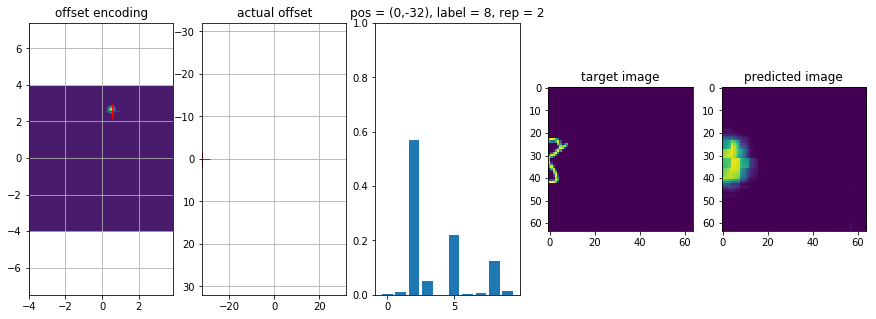

torch.Size([50, 1, 28, 28])
0 -28
[[ 0.272787    2.34978574]] [[ 0.28613884  2.32475407]]


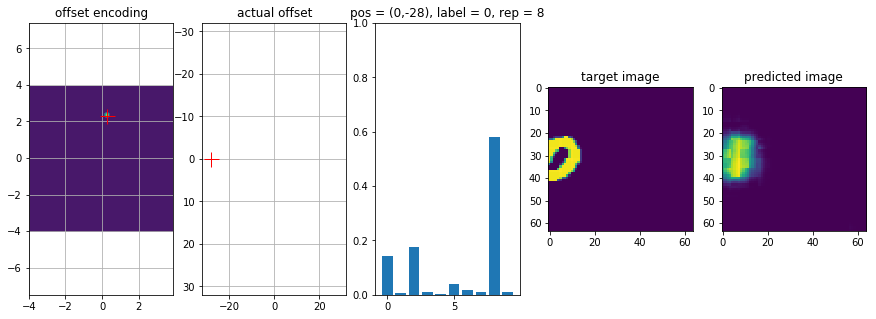

torch.Size([50, 1, 28, 28])
0 -24
[[ 0.41082136  2.13154685]] [[ 0.4320912   2.09092587]]


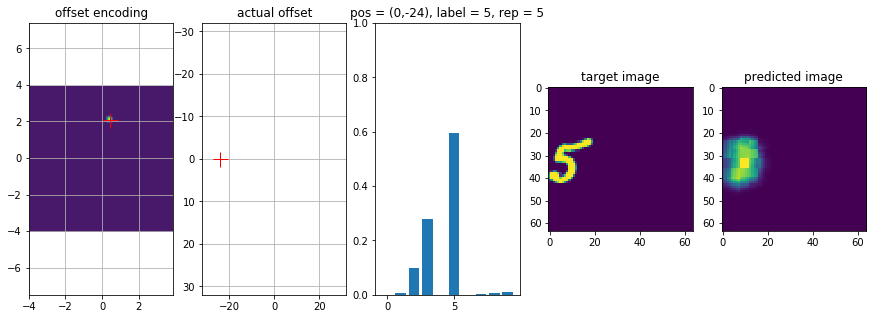

torch.Size([50, 1, 28, 28])
0 -20
[[ 0.51800556  1.71989535]] [[ 0.66010661  1.76356852]]


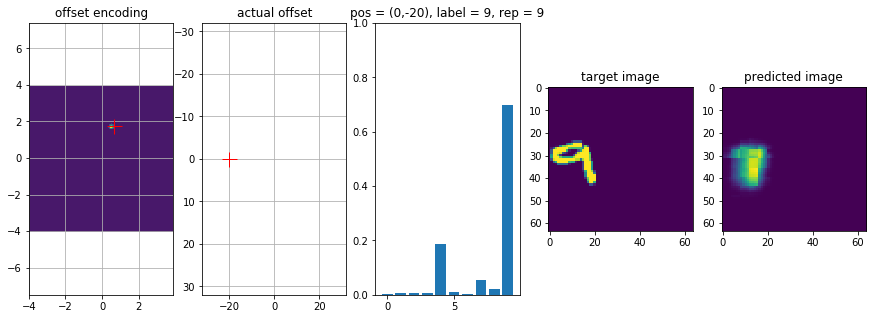

torch.Size([50, 1, 28, 28])
0 -16
[[ 0.37199136  1.4400261 ]] [[ 0.12298256  1.47593056]]


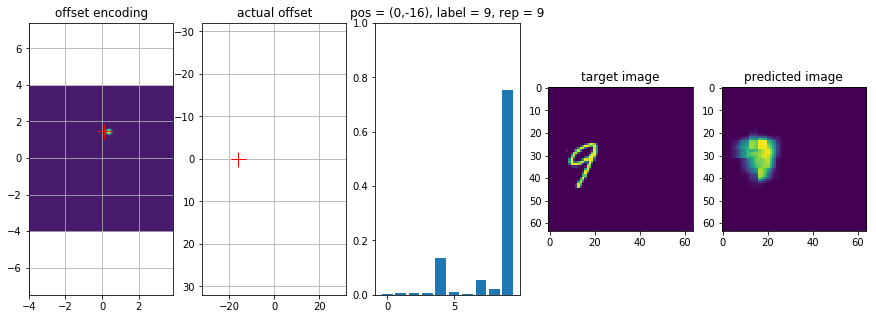

torch.Size([50, 1, 28, 28])
0 -12
[[ 0.29938778  1.07105997]] [[ 0.36348192  1.05216747]]


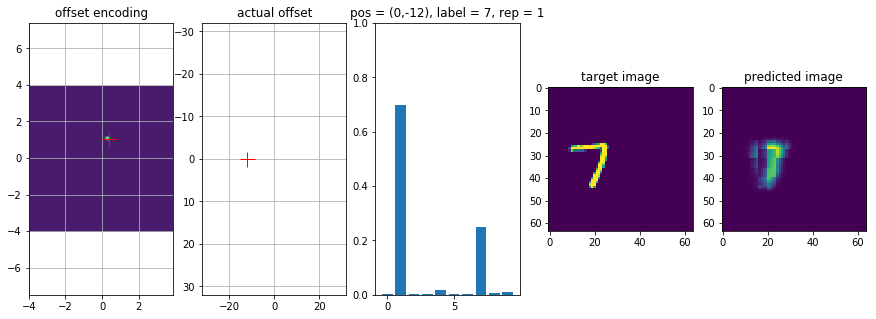

torch.Size([50, 1, 28, 28])
0 -8
[[ 0.18412003  0.7324261 ]] [[ 0.27459412  0.74890029]]


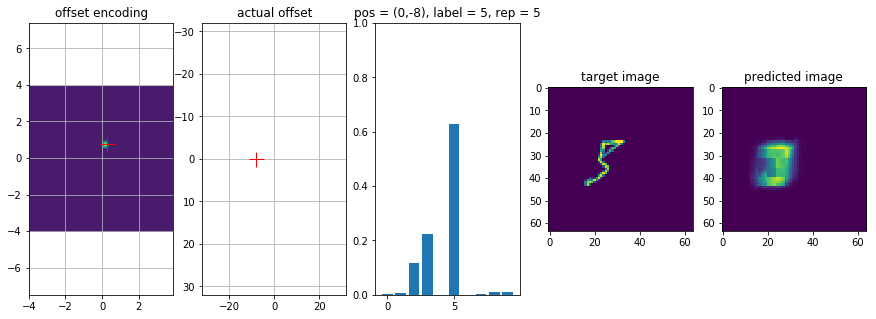

torch.Size([50, 1, 28, 28])
0 -4
[[ 0.26673928  0.35460143]] [[ 0.26283264  0.34899243]]


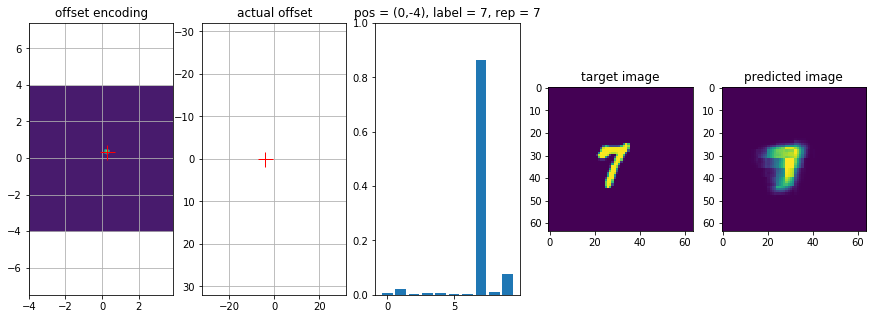

torch.Size([50, 1, 28, 28])
0 0
[[ 0.06507984  0.03906111]] [[ 0.08029141  0.06930828]]


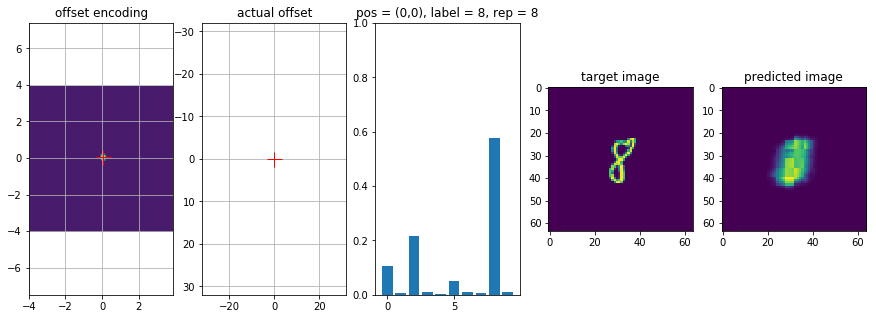

torch.Size([50, 1, 28, 28])
0 4
[[ 0.01625887 -0.33681742]] [[ 0.03189713 -0.20216481]]


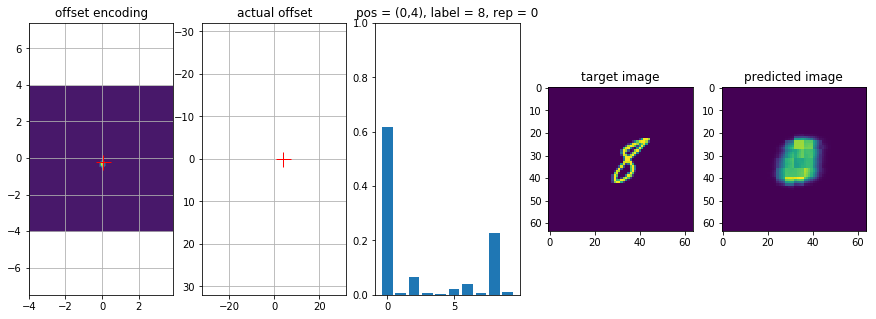

torch.Size([50, 1, 28, 28])
0 8
[[ 0.04279135 -0.74960918]] [[ 0.07688451 -0.64267127]]


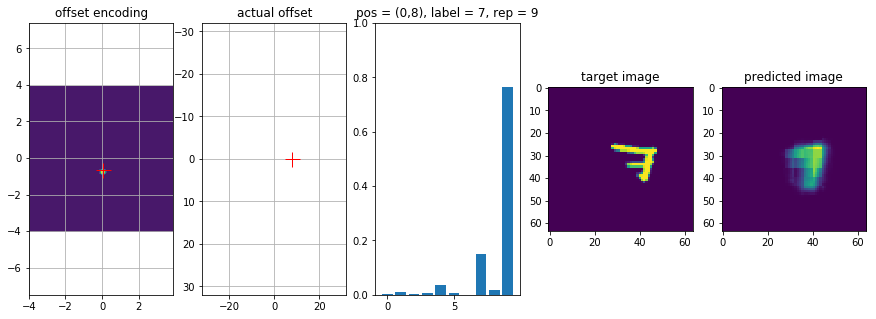

torch.Size([50, 1, 28, 28])
0 12
[[-0.09319694 -1.10770626]] [[-0.09548232 -1.11157327]]


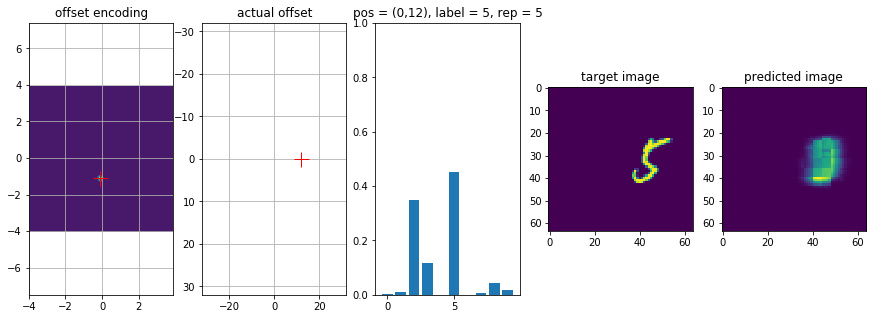

torch.Size([50, 1, 28, 28])
0 16
[[-0.09718528 -1.38382513]] [[-0.07614169 -1.37700109]]


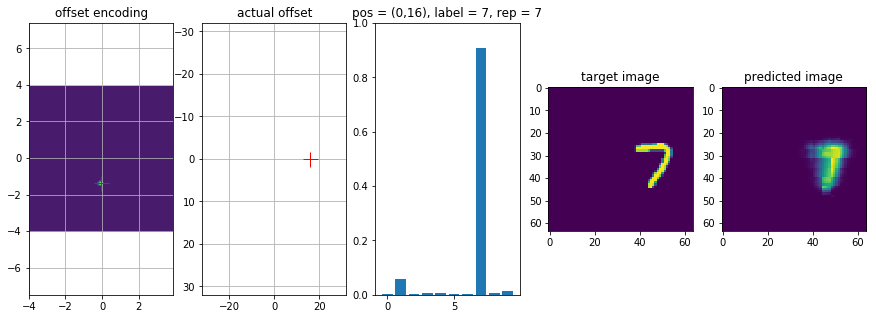

torch.Size([50, 1, 28, 28])
0 20
[[-0.13976061 -1.81634688]] [[-0.10741107 -1.79239967]]


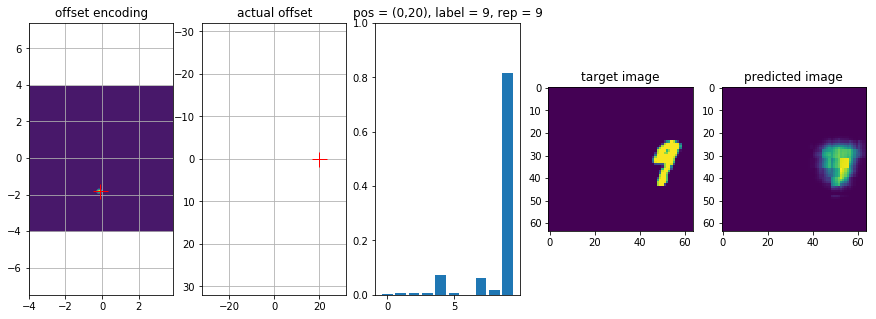

torch.Size([50, 1, 28, 28])
0 24
[[-0.3044527 -2.2073288]] [[-0.37091067 -2.13244802]]


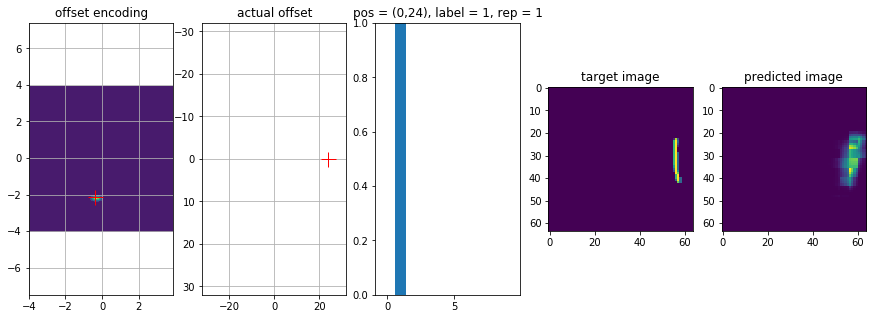

torch.Size([50, 1, 28, 28])
0 28
[[-0.43887215 -2.46345301]] [[-0.64424598 -2.43141559]]


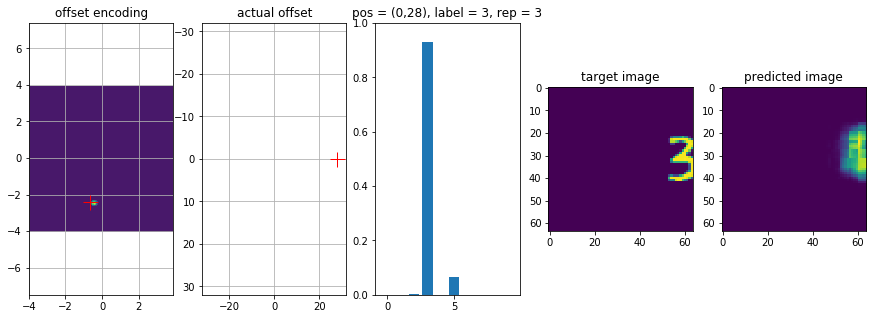

In [20]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_alt import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output[:,:4:3].detach().numpy()
    mu_offset = mu_output[:,:4:3].detach().numpy()
    logvar_offset = logvar_output[:,:4:3].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

tensor(3)
0 -32


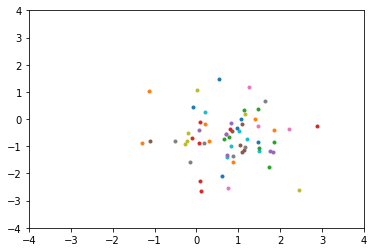

tensor(3)
0 -28


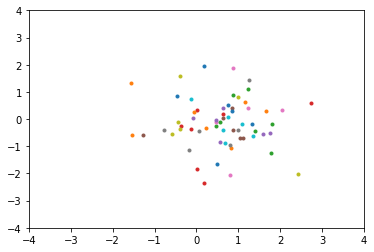

tensor(3)
0 -24


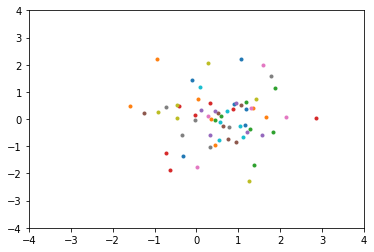

tensor(3)
0 -20


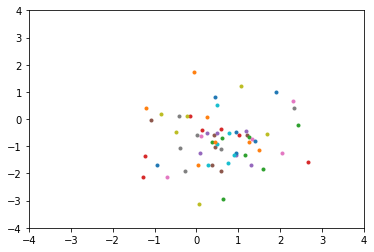

tensor(3)
0 -16


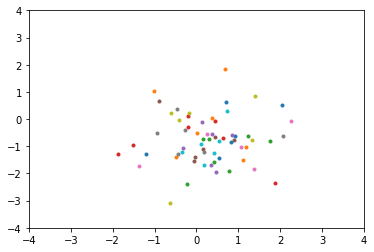

tensor(3)
0 -12


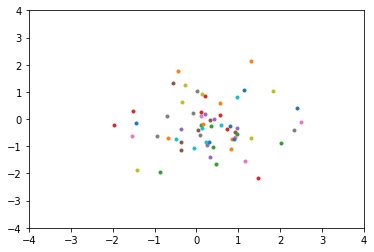

tensor(3)
0 -8


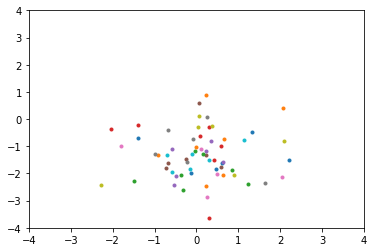

tensor(3)
0 -4


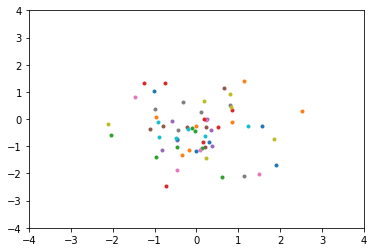

tensor(3)
0 0


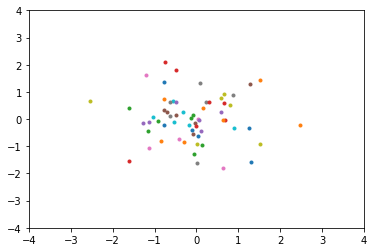

tensor(3)
0 4


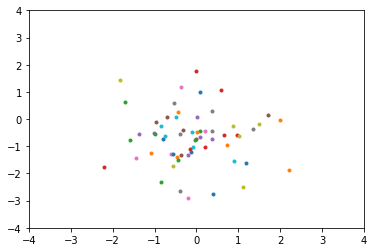

tensor(3)
0 8


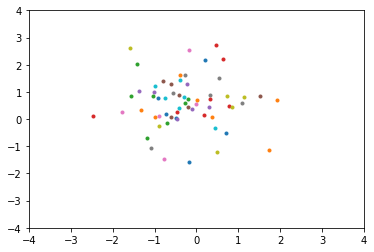

tensor(3)
0 12


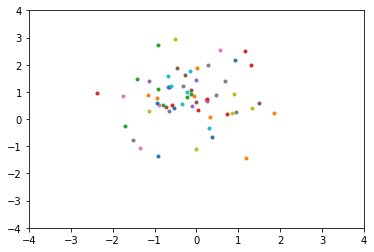

tensor(3)
0 16


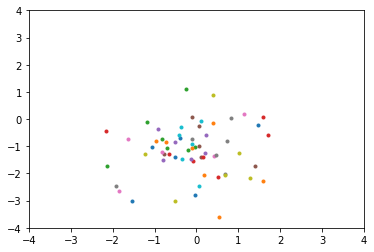

tensor(3)
0 20


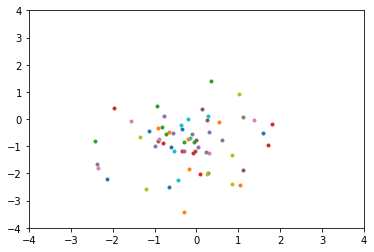

tensor(3)
0 24


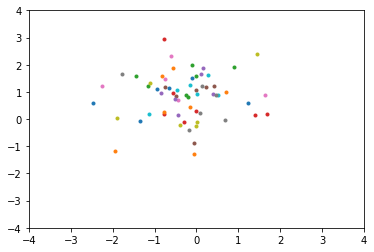

tensor(3)
0 28


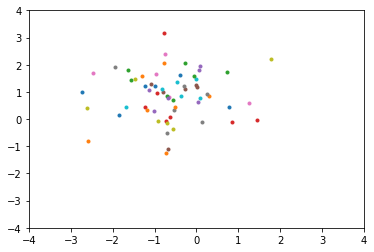

In [24]:
from Where_act_code_VAE_classif_alt import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(-32,32,4):
    #label[idx] = z
    idx = 3
    print(label[idx])
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[4:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
torch.distributions.multinomial.Multinomial(